In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import copy
import matplotlib.pyplot as plt
import glob
from pathlib import Path
import os
import plotly.express as px
from matplotlib import cm
import matplotlib as mpl
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
import matplotlib as mpl
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy
import sklearn
from sklearn.linear_model import LinearRegression
from scipy.stats import gaussian_kde
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [2]:
work_dir=Path("/mnt/u/LSM root zone/global_sr")

In [3]:
data_sources = 'gswp-p_gleam-ep_gswp-t'

## 1. Plot Sr vs descriptors

In [3]:
f = f'{work_dir}/output/catchment_characteristics/master_characteristics_gswp-p_gleam-ep_gswp-t.csv'
df = pd.read_csv(f,index_col=0)
df = df.dropna()
df = df.drop(columns=['stext','start_year','end_year','years','kg'])
df_st = StandardScaler().fit_transform(df) #standardize all values
df_st = pd.DataFrame(df_st)
df_st.index = df.index
df_st.columns = df.columns

In [180]:
# plot sr vs descriptors
def plot_sr_vs_var(df,var1,var2,mode):
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)
    ax.plot(df[var1],df[var2],'go',markersize=1)
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    rs = np.corrcoef(df[var1],df[var2])[0,1]**2
    ax.set_title(f'n={len(df[var1])}; r-squared: {np.round(rs,3)}')
    fig.savefig(f'{work_dir}/output/figures/prediction_figures/sr_scatters/{mode}/{var1}_{var2}.jpg', bbox_inches='tight',dpi=300)
    plt.close()
    
def plot_sr_vs_var_tc(df,var1,var2,mode):
    cmap = cm.get_cmap('viridis_r', 21)
    bounds = np.linspace(0,0.5,5)
    bounds2 = np.linspace(0,0.5,5)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    fig = plt.figure(figsize=(13, 6))
    ax1 = plt.subplot(2,4,3)
    ax2 = plt.subplot(2,4,4)
    ax3 = plt.subplot(2,4,7)
    ax4 = plt.subplot(2,4,8)
    ax5 = plt.subplot(1,2,1)
    axes = [ax1, ax2, ax3, ax4,ax5]
    s = ax5.scatter(df[var1],df[var2],c=df['tc'],s=0.5,cmap=cmap,norm=norm)
    cbar = plt.colorbar(s, orientation='vertical', label='',spacing='proportional',extend='max', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(label='tree cover (-)', size=12)
    ax5.set_xlabel(var1,size=12)
    ax5.set_ylabel(var2,size=12)
    ax1.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax2.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax3.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax4.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax5.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax1.set_ylim(0,900)
    ax2.set_ylim(0,900)
    ax3.set_ylim(0,900)
    ax4.set_ylim(0,900)
    ax5.set_ylim(0,900)
    rs = np.corrcoef(df[var1],df[var2])[0,1]**2
    ax5.set_title(f'n={len(df[var1])}; r-squared: {np.round(rs,3)}')
    ax5.tick_params(labelsize=12)
    ax1.scatter(df[var1][df['tc']<bounds[1]],df[var2][df['tc']<bounds[1]],c=df['tc'][df['tc']<bounds[1]],s=0.5,cmap=cmap,norm=norm)
    ax2.scatter(df[var1][(df['tc']>=bounds[1])&(df['tc']<bounds[2])],df[var2][(df['tc']>=bounds[1])&(df['tc']<bounds[2])],c=df['tc'][(df['tc']>=bounds[1])&(df['tc']<bounds[2])],s=0.5,cmap=cmap,norm=norm)
    ax3.scatter(df[var1][(df['tc']>=bounds[2])&(df['tc']<bounds[3])],df[var2][(df['tc']>=bounds[2])&(df['tc']<bounds[3])],c=df['tc'][(df['tc']>=bounds[2])&(df['tc']<bounds[3])],s=0.5,cmap=cmap,norm=norm)
    ax4.scatter(df[var1][(df['tc']>=bounds[3])],df[var2][(df['tc']>=bounds[3])],c=df['tc'][(df['tc']>=bounds[3])],s=0.5,cmap=cmap,norm=norm)
    fig.savefig(f'{work_dir}/output/figures/prediction_figures/sr_scatters/{mode}/{var1}_{var2}.jpg', bbox_inches='tight',dpi=300)
    plt.close()
    
def plot_sr_vs_var_ntc(df,var1,var2,mode):
    cmap = cm.get_cmap('viridis', 21)
    bounds = np.linspace(0.3,0.8,5)
    bounds2 = np.linspace(0.3,0.8,5)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    fig = plt.figure(figsize=(13, 6))
    ax1 = plt.subplot(2,4,3)
    ax2 = plt.subplot(2,4,4)
    ax3 = plt.subplot(2,4,7)
    ax4 = plt.subplot(2,4,8)
    ax5 = plt.subplot(1,2,1)
    axes = [ax1, ax2, ax3, ax4,ax5]
    s = ax5.scatter(df[var1],df[var2],c=df['ntc'],s=0.5,cmap=cmap,norm=norm)
    cbar = plt.colorbar(s, orientation='vertical', label='',spacing='proportional',extend='max', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(label='non tree cover (-)', size=12)
    ax5.set_xlabel(var1,size=12)
    ax5.set_ylabel(var2,size=12)
    ax1.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax2.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax3.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax4.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax5.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax1.set_ylim(0,900)
    ax2.set_ylim(0,900)
    ax3.set_ylim(0,900)
    ax4.set_ylim(0,900)
    ax5.set_ylim(0,900)
    rs = np.corrcoef(df[var1],df[var2])[0,1]**2
    ax5.set_title(f'n={len(df[var1])}; r-squared: {np.round(rs,3)}')
    ax5.tick_params(labelsize=12)
    ax1.scatter(df[var1][df['ntc']<bounds[1]],df[var2][df['ntc']<bounds[1]],c=df['ntc'][df['ntc']<bounds[1]],s=0.5,cmap=cmap,norm=norm)
    ax2.scatter(df[var1][(df['ntc']>=bounds[1])&(df['ntc']<bounds[2])],df[var2][(df['ntc']>=bounds[1])&(df['ntc']<bounds[2])],c=df['ntc'][(df['ntc']>=bounds[1])&(df['ntc']<bounds[2])],s=0.5,cmap=cmap,norm=norm)
    ax3.scatter(df[var1][(df['ntc']>=bounds[2])&(df['ntc']<bounds[3])],df[var2][(df['ntc']>=bounds[2])&(df['ntc']<bounds[3])],c=df['ntc'][(df['ntc']>=bounds[2])&(df['ntc']<bounds[3])],s=0.5,cmap=cmap,norm=norm)
    ax4.scatter(df[var1][(df['ntc']>=bounds[3])],df[var2][(df['ntc']>=bounds[3])],c=df['ntc'][(df['ntc']>=bounds[3])],s=0.5,cmap=cmap,norm=norm)
    fig.savefig(f'{work_dir}/output/figures/prediction_figures/sr_scatters/{mode}/{var1}_{var2}.jpg', bbox_inches='tight',dpi=300)
    plt.close()
    
def plot_sr_vs_var_ai(df,var1,var2,mode):
    cmap = cm.get_cmap('viridis', 21)
    bounds = np.linspace(0,2,5)
    bounds2 = np.linspace(0,2,5)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    fig = plt.figure(figsize=(13, 6))
    ax1 = plt.subplot(2,4,3)
    ax2 = plt.subplot(2,4,4)
    ax3 = plt.subplot(2,4,7)
    ax4 = plt.subplot(2,4,8)
    ax5 = plt.subplot(1,2,1)
    axes = [ax1, ax2, ax3, ax4,ax5]
    s = ax5.scatter(df[var1],df[var2],c=df['ai'],s=0.5,cmap=cmap,norm=norm)
    cbar = plt.colorbar(s, orientation='vertical', label='',spacing='proportional',extend='max', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(label='aridity index', size=12)
    ax5.set_xlabel(var1,size=12)
    ax5.set_ylabel(var2,size=12)
    ax1.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax2.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax3.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax4.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax5.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax1.set_ylim(0,900)
    ax2.set_ylim(0,900)
    ax3.set_ylim(0,900)
    ax4.set_ylim(0,900)
    ax5.set_ylim(0,900)
    rs = np.corrcoef(df[var1],df[var2])[0,1]**2
    ax5.set_title(f'n={len(df[var1])}; r-squared: {np.round(rs,3)}')
    ax5.tick_params(labelsize=12)
    ax1.scatter(df[var1][df['ai']<bounds[1]],df[var2][df['ai']<bounds[1]],c=df['ai'][df['ai']<bounds[1]],s=0.5,cmap=cmap,norm=norm)
    ax2.scatter(df[var1][(df['ai']>=bounds[1])&(df['ai']<bounds[2])],df[var2][(df['ai']>=bounds[1])&(df['ai']<bounds[2])],c=df['ai'][(df['ai']>=bounds[1])&(df['ai']<bounds[2])],s=0.5,cmap=cmap,norm=norm)
    ax3.scatter(df[var1][(df['ai']>=bounds[2])&(df['ai']<bounds[3])],df[var2][(df['ai']>=bounds[2])&(df['ai']<bounds[3])],c=df['ai'][(df['ai']>=bounds[2])&(df['ai']<bounds[3])],s=0.5,cmap=cmap,norm=norm)
    ax4.scatter(df[var1][(df['ai']>=bounds[3])],df[var2][(df['ai']>=bounds[3])],c=df['ai'][(df['ai']>=bounds[3])],s=0.5,cmap=cmap,norm=norm)
    fig.savefig(f'{work_dir}/output/figures/prediction_figures/sr_scatters/{mode}/{var1}_{var2}.jpg', bbox_inches='tight',dpi=300)
    plt.close()

In [5]:
var = df.columns
for i in var:
    plot_sr_vs_var(df,i,'sr_20','keep_units')
    plot_sr_vs_var(df_st,i,'sr_20','standardized')
    plot_sr_vs_var_tc(df,i,'sr_20','tree_cover')
    plot_sr_vs_var_ntc(df,i,'sr_20','non_tree_cover')
    plot_sr_vs_var_ai(df,i,'sr_20','aridity_index')

## 2. PCA + clusters

In [5]:
f = f'{work_dir}/output/catchment_characteristics/master_characteristics_gswp-p_gleam-ep_gswp-t.csv'
df = pd.read_csv(f,index_col=0)
df = df.dropna()
df = df.drop(columns=['stext','start_year','end_year','years','kg','lat','lon'])
df = df.drop(columns=['idu_mean_l', 'idu_max_l', 'hpd_mean_l',
       'hpd_max_l', 'hpf_l', 'lpf_l', 'si_pl', 'phi_l', 'de_l', 'dp_l', 'dt_l',
       'sp_l', 'st_l', 'se_l', 'sd_l', 'sti_l', 'asi_l'])
df = df.drop(columns=['q_mean'])
df

,p_mean,ep_mean,t_mean,ai,hai,tdiff_max,tdiff_mean,idu_mean,idu_max,hpd_mean,...,slp_std,iwu,ia,bp,dtb,pclay,psand,pcarb,bulk,sr_20
br_0003200,5.303953,2.608627,19.857762,0.491827,0.604298,14.268765,12.021896,4.21,16.93,1.22,...,3.590448,0.100052,0.095052,0.000000,13.89,36.399144,37.698498,2.198518,132.033822,123.596026
ca_0002351,1.590253,1.401269,0.643260,0.881161,0.419085,32.852726,25.221876,5.05,22.43,1.35,...,7.937310,0.000692,0.003286,0.069907,19.41,17.094944,45.838508,4.124604,134.041930,85.414394
fr_0001142,2.989535,1.520868,10.193313,0.508730,0.563267,23.400001,19.250000,3.87,20.35,1.15,...,1.086816,0.000000,0.000147,0.000000,15.27,28.276790,28.212561,2.762086,141.694949,197.286771
br_0001524,4.594565,2.985874,19.671313,0.649871,0.691181,10.875286,7.688446,3.35,18.23,1.23,...,2.908957,0.004303,0.004408,0.000000,18.95,43.042378,38.771631,3.079075,115.424594,160.222472
in_0000027,3.368431,2.750685,25.678652,0.816607,1.198574,17.669193,15.270651,17.75,72.93,1.77,...,1.251385,0.094199,0.016516,0.003903,22.31,39.763032,35.817680,1.576522,156.472020,396.277444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gb_0000090,2.150804,1.572770,10.290431,0.731247,0.776424,18.325000,14.624166,3.88,22.30,1.12,...,1.305189,0.001370,0.000274,0.000000,8.63,19.798915,38.049589,3.841592,135.921367,117.701360
229661A,3.269137,2.950922,11.876446,0.902661,0.586347,15.333334,12.496111,3.64,17.63,1.15,...,2.799325,0.000000,0.000000,0.000000,3.88,25.550696,53.458085,7.154145,114.292085,189.439878
br_0000871,4.374842,2.735070,22.204727,0.625182,0.819372,7.895573,6.125985,5.96,53.53,1.37,...,1.406948,0.004821,0.002569,0.000000,24.83,45.266696,38.176125,2.532475,113.757366,203.656842
gb_0000104,2.294868,1.268865,10.186598,0.552914,0.720360,17.800003,14.266667,3.77,22.73,1.13,...,0.662397,0.000351,0.004777,0.000000,9.95,26.563523,30.053947,3.540056,139.665966,55.107518


In [6]:
df.columns

Index(['p_mean', 'ep_mean', 't_mean', 'ai', 'hai', 'tdiff_max', 'tdiff_mean',
       'idu_mean', 'idu_max', 'hpd_mean', 'hpd_max', 'hpf', 'lpf', 'si_p',
       'si_ep', 'phi', 'de', 'dp', 'dt', 'sp', 'st', 'se', 'sd', 'sti', 'ftf',
       'asi', 'cvp', 'tc', 'ntc', 'nonveg', 'area', 'el_mean', 'el_min',
       'el_max', 'el_std', 'slp_mean', 'slp_max', 'slp_min', 'slp_std', 'iwu',
       'ia', 'bp', 'dtb', 'pclay', 'psand', 'pcarb', 'bulk', 'sr_20'],
      dtype='object')

In [7]:
features = df.columns
lf = len(features)
print('length of features:', lf)
X = df[features]
X = X.dropna()
X = StandardScaler().fit_transform(X) #standardize all values
X = pd.DataFrame(X,columns=features)

pca = PCA(n_components=lf)
components = pca.fit_transform(X)

loadings = pca.components_ #eigenvector, length represents variance var explains
 
# Create dataframe
pca_df = pd.DataFrame(data=components[:,0:2],columns=['PC1', 'PC2'])

length of features: 48


In [8]:
pca_df_scaled = pca_df.copy()
 
scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min()) # WAAROM DIT?
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

per_var  = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
per_var

array([21.1, 12.8, 11.6,  5.5,  4.4,  4.2,  3.6,  3. ,  2.7,  2.6,  2.5,
        2.3,  2.2,  2.1,  2. ,  1.6,  1.5,  1.5,  1.3,  1.3,  1.2,  1.1,
        0.9,  0.9,  0.8,  0.7,  0.6,  0.6,  0.5,  0.4,  0.4,  0.4,  0.3,
        0.2,  0.2,  0.2,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0. ,
        0. ,  0. ,  0. ,  0. ])

In [9]:
# split features for visualization of PCA
p = int(lf/7)
features1=features[0:p]
features2=features[p:2*p]
features3=features[2*p:3*p]
features4=features[3*p:4*p]
features5=features[4*p:5*p]
features6=features[5*p:6*p]
features7=features[6*p:]

In [10]:
ld_df = pd.DataFrame(index=features, columns=['xs','ys'])
ld_df['xs'] = loadings[0]
ld_df['ys'] = loadings[1]
ld_df['len'] = np.sqrt(loadings[0]**2+loadings[1]**2)
# ld_df

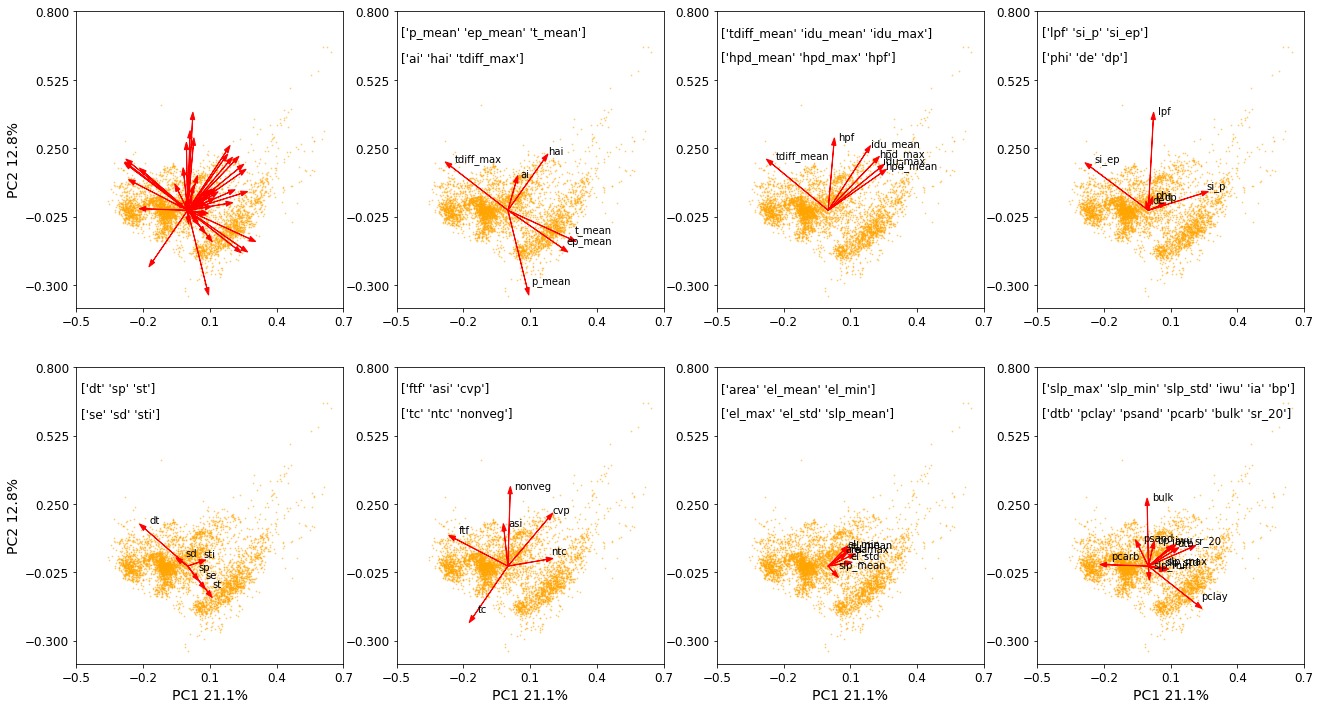

In [11]:
xs = loadings[0]
ys = loadings[1]

fig=plt.figure(figsize=(22,12))
ax = fig.add_subplot(241)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')

for i, varnames in enumerate(features):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features[i]]['xs'], # length of the arrow along x
        ld_df.loc[features[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    # ax.text(ld_df.loc[features[i]]['xs']+0.02, ld_df.loc[features[i]]['ys']+0.02, varnames,size=10)
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=12)
# ax.set_xlabel(f'PC1 {per_var[0]}%')
ax.set_ylabel(f'PC2 {per_var[1]}%',size=14)

ax = fig.add_subplot(242)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')
for i, varnames in enumerate(features1):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features1[i]]['xs'], # length of the arrow along x
        ld_df.loc[features1[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features1[i]]['xs']+0.02, ld_df.loc[features1[i]]['ys']+0.02, varnames,size=10)
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.text(-0.48,0.7,f'{features1[0:int(len(features1)/2)].values}',size=12)
ax.text(-0.48,0.6,f'{features1[int(len(features1)/2):].values}',size=12)

ax = fig.add_subplot(243)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')
for i, varnames in enumerate(features2):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features2[i]]['xs'], # length of the arrow along x
        ld_df.loc[features2[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features2[i]]['xs']+0.02, ld_df.loc[features2[i]]['ys']+0.02, varnames,size=10)
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.text(-0.48,0.7,f'{features2[0:int(len(features2)/2)].values}',size=12)
ax.text(-0.48,0.6,f'{features2[int(len(features2)/2):].values}',size=12)

ax = fig.add_subplot(244)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')
for i, varnames in enumerate(features3):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features3[i]]['xs'], # length of the arrow along x
        ld_df.loc[features3[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features3[i]]['xs']+0.02, ld_df.loc[features3[i]]['ys']+0.02, varnames,size=10)
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.text(-0.48,0.7,f'{features3[0:int(len(features3)/2)].values}',size=12)
ax.text(-0.48,0.6,f'{features3[int(len(features3)/2):].values}',size=12)

ax = fig.add_subplot(245)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')
for i, varnames in enumerate(features4):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features4[i]]['xs'], # length of the arrow along x
        ld_df.loc[features4[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features4[i]]['xs']+0.02, ld_df.loc[features4[i]]['ys']+0.02, varnames,size=10)
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel(f'PC1 {per_var[0]}%',size=14)
ax.set_ylabel(f'PC2 {per_var[1]}%',size=14)
ax.text(-0.48,0.7,f'{features4[0:int(len(features4)/2)].values}',size=12)
ax.text(-0.48,0.6,f'{features4[int(len(features4)/2):].values}',size=12)

ax = fig.add_subplot(246)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')
for i, varnames in enumerate(features5):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features5[i]]['xs'], # length of the arrow along x
        ld_df.loc[features5[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features5[i]]['xs']+0.02, ld_df.loc[features5[i]]['ys']+0.02, varnames,size=10) 
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel(f'PC1 {per_var[0]}%',size=14)
ax.text(-0.48,0.7,f'{features5[0:int(len(features5)/2)].values}',size=12)
ax.text(-0.48,0.6,f'{features5[int(len(features5)/2):].values}',size=12)

ax = fig.add_subplot(247)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')
for i, varnames in enumerate(features6):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features6[i]]['xs'], # length of the arrow along x
        ld_df.loc[features6[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features6[i]]['xs']+0.02, ld_df.loc[features6[i]]['ys']+0.02, varnames,size=10)
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel(f'PC1 {per_var[0]}%',size=14)
ax.text(-0.48,0.7,f'{features6[0:int(len(features6)/2)].values}',size=12)
ax.text(-0.48,0.6,f'{features6[int(len(features6)/2):].values}',size=12)

ax = fig.add_subplot(248)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')
for i, varnames in enumerate(features7):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features7[i]]['xs'], # length of the arrow along x
        ld_df.loc[features7[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features7[i]]['xs']+0.02, ld_df.loc[features7[i]]['ys']+0.02, varnames,size=10)
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel(f'PC1 {per_var[0]}%',size=14)
ax.text(-0.48,0.7,f'{features7[0:int(len(features7)/2)].values}',size=12)
ax.text(-0.48,0.6,f'{features7[int(len(features7)/2):].values}',size=12)
fig.savefig(f'{work_dir}/output/figures/prediction_figures/pca/pca_scatters.jpg',bbox_inches='tight',dpi=300)


In [12]:
ld_sort = ld_df.sort_values('len',ascending=False)
ld_sort = ld_sort[0:20]
ld_sort['rank'] = np.arange(1,len(ld_sort)+1,1)
ld_sort = ld_sort.drop(columns=['xs','ys'])
ld_sort

,len,rank
lpf,0.365941,1
p_mean,0.324323,2
tdiff_mean,0.316317,3
si_ep,0.313831,4
tdiff_max,0.313196,5
t_mean,0.301135,6
idu_mean,0.293594,7
nonveg,0.291227,8
ep_mean,0.288070,9
hpd_max,0.287291,10


In [13]:
# features = ld_sort.index.values
features = ['lpf','si_ep','ep_mean','idu_mean','p_mean','si_p','tc']
features = np.append(features,'sr_20')
lf = len(features)
print('length of features:', lf)
X = df[features]
X = X.dropna()
X = StandardScaler().fit_transform(X) #standardize all values
X = pd.DataFrame(X,columns=features)

pca = PCA(n_components=lf)
components = pca.fit_transform(X)

loadings = pca.components_ #eigenvector, length represents variance var explains
 
# Create dataframe
pca_df = pd.DataFrame(data=components[:,0:2],columns=['PC1', 'PC2'])

length of features: 8


In [14]:
pca_df_scaled = pca_df.copy()
 
scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min()) # WAAROM DIT?
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

per_var  = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
per_var

array([39.9, 33.3,  8.2,  7.1,  4.9,  3.8,  1.9,  0.7])

In [15]:
# split features for visualization of PCA
p = int(lf/7)
features1=features[0:p]
features2=features[p:2*p]
features3=features[2*p:3*p]
features4=features[3*p:4*p]
features5=features[4*p:5*p]
features6=features[5*p:6*p]
features7=features[6*p:]

In [16]:
ld_df = pd.DataFrame(index=features, columns=['xs','ys'])
ld_df['xs'] = loadings[0]
ld_df['ys'] = loadings[1]
ld_df['len'] = np.sqrt(loadings[0]**2+loadings[1]**2)
ld_df

,xs,ys,len
lpf,-0.035646,0.553882,0.555028
si_ep,-0.494723,0.201692,0.534257
ep_mean,0.487868,-0.190058,0.523581
idu_mean,0.283914,0.383635,0.477266
p_mean,0.244688,-0.490985,0.548579
si_p,0.459529,0.164758,0.488172
tc,-0.187013,-0.399798,0.441376
sr_20,0.359643,0.202946,0.412953


k=5 is ok


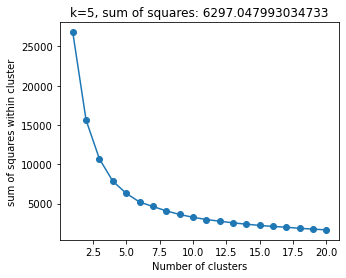

In [17]:
#Identify the number of clusters
s=[]
for i in range(1,21):
    kmeans = KMeans(i, random_state=42)
    kmeans.fit(pca_df)
    s.append(kmeans.inertia_)
# plot cluster scores
plt.figure(figsize=(5,4))
plt.plot(range(1,21),s,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('sum of squares within cluster')
plt.title(f'k=5, sum of squares: {s[4]}')
print('k=5 is ok')
plt.savefig(f'{work_dir}/output/figures/prediction_figures/pca/k_clusters.jpg',bbox_inches='tight',dpi=300)


In [18]:
# run with k=5
kmeans = KMeans(5, random_state=42)
kmeans.fit(pca_df)
identified_clusters = kmeans.fit_predict(pca_df)
labels = kmeans.labels_

data_with_clusters = pca_df.copy()
data_with_clusters['Clusters'] = identified_clusters

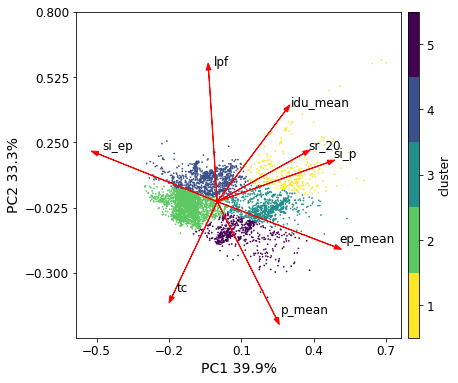

In [19]:
xs = loadings[0]
ys = loadings[1]

cmap_vd2 = cm.get_cmap('viridis_r', 5)
bounds = np.linspace(0,5,6)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

fig=plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
s=ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,c=data_with_clusters.Clusters,s=0.5,cmap=cmap_vd2,norm=norm)
cbar = plt.colorbar(s, orientation='vertical', label='',spacing='proportional',extend='neither', pad=0.02,aspect=30, norm=norm)
cbar.set_ticks([0.5,1.5,2.5,3.5,4.5])
cbar.set_ticklabels(['1','2','3','4','5'])
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='cluster', size=12)
for i, varnames in enumerate(features):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features[i]]['xs'], # length of the arrow along x
        ld_df.loc[features[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features[i]]['xs']+0.02, ld_df.loc[features[i]]['ys']+0.02, varnames,size=12)
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel(f'PC1 {per_var[0]}%',size=14)
ax.set_ylabel(f'PC2 {per_var[1]}%',size=14)
fig.savefig(f'{work_dir}/output/figures/prediction_figures/pca/pca_scatters_selected.jpg',bbox_inches='tight',dpi=300)


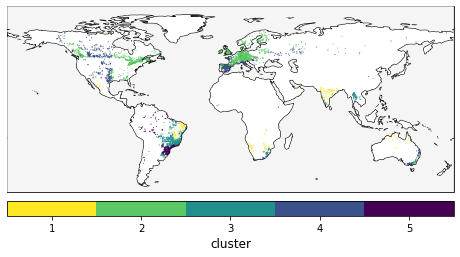

In [20]:
# map Sr
data_sources = 'gswp-p_gleam-ep_gswp-t'
co = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}.csv',index_col=0)
co = co.dropna()
co['cluster'] = data_with_clusters['Clusters'].values
co.to_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}_clusters.csv')

cmap_vd2 = cm.get_cmap('viridis_r', 5)
bounds = np.linspace(0,5,6)
bounds2 = np.linspace(0,5,6)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(co.lon,co.lat,s=0.8,c=co['cluster'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='neither', pad=0.02,aspect=30, norm=norm)
cbar.set_ticks([0.5,1.5,2.5,3.5,4.5])
cbar.set_ticklabels(['1','2','3','4','5'])
cbar.set_label(label='cluster', size=12)
ax.set_title('',size=14)
fig.savefig(f'{work_dir}/output/figures/prediction_figures/pca/cluster_map.jpg', bbox_inches='tight',dpi=300)


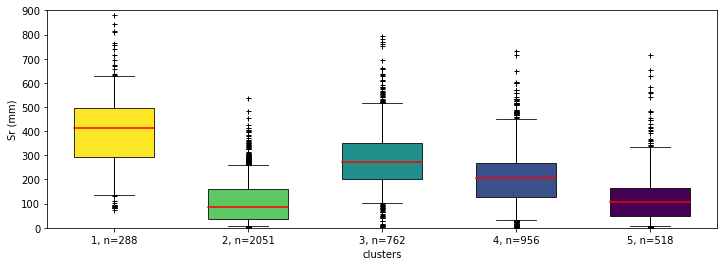

In [21]:
boxprops1 = dict(facecolor=cmap_vd2(0),color="black",linewidth=0.8)
boxprops2 = dict(facecolor=cmap_vd2(1),color="black",linewidth=0.8)
boxprops3 = dict(facecolor=cmap_vd2(2),color="black",linewidth=0.8)
boxprops4 = dict(facecolor=cmap_vd2(3),color="black",linewidth=0.8)
boxprops5 = dict(facecolor=cmap_vd2(4),color="black",linewidth=0.8)
medianprops = dict(color="red",linewidth=1.5)
flierprops = dict(color='black',marker='+',markersize=5)
capprops = dict(linestyle='-', linewidth=0.8, color='Black')

co1 = co[co.cluster==0]
co2 = co[co.cluster==1]
co3 = co[co.cluster==2]
co4 = co[co.cluster==3]
co5 = co[co.cluster==4]

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
ax.boxplot(co1.sr_20,positions=[1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(co2.sr_20,positions=[2],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(co3.sr_20,positions=[3],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops3,medianprops=medianprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(co4.sr_20,positions=[4],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops4,medianprops=medianprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(co5.sr_20,positions=[5],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops5,medianprops=medianprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.xaxis.set_ticks([1,2,3,4,5])
ax.xaxis.set_ticklabels([f'1, n={len(co1)}',f'2, n={len(co2)}',f'3, n={len(co3)}',f'4, n={len(co4)}',f'5, n={len(co5)}'])
ax.set_ylabel('Sr (mm)')
ax.set_xlabel('clusters')
ax.set_ylim(0,900)
fig.savefig(f'{work_dir}/output/figures/prediction_figures/pca/cluster_sr_boxplot.jpg', bbox_inches='tight',dpi=300)


In [22]:
def plot_sr_vs_var_clusters(df,var1,var2,mode):
    cmap = cm.get_cmap('viridis_r', 5)
    bounds = np.linspace(0,5,6)
    bounds2 = np.linspace(0,5,6)
    norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

    fig = plt.figure(figsize=(20, 6))
    ax1 = plt.subplot(2,6,3)
    ax2 = plt.subplot(2,6,4)
    ax3 = plt.subplot(2,6,5)
    ax4 = plt.subplot(2,6,9)
    ax6 = plt.subplot(2,6,10)
    ax5 = plt.subplot(1,3,1)
    
    axes = [ax1, ax2, ax3, ax4,ax5]
    s = ax5.scatter(df[var1],df[var2],c=df['cluster'],s=0.5,cmap=cmap,norm=norm)
    cbar = plt.colorbar(s, orientation='vertical', label='',spacing='proportional',extend='neither', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(label='cluster', size=12)
    cbar.set_ticks([0.5,1.5,2.5,3.5,4.5])
    cbar.set_ticklabels(['1','2','3','4','5'])
    ax5.set_xlabel(var1,size=12)
    ax5.set_ylabel(var2,size=12)
    ax1.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax2.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax3.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax4.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax5.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax6.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax1.set_ylim(0,900)
    ax2.set_ylim(0,900)
    ax3.set_ylim(0,900)
    ax4.set_ylim(0,900)
    ax5.set_ylim(0,900)
    ax6.set_ylim(0,900)
    rs = np.corrcoef(df[var1],df[var2])[0,1]**2
    ax5.set_title(f'n={len(df[var1])}; r-squared: {np.round(rs,3)}')
    ax5.tick_params(labelsize=12)
    ax1.scatter(df[var1][df['cluster']==0],df[var2][df['cluster']==0],s=0.5,color=cmap(0),norm=norm)
    ax2.scatter(df[var1][df['cluster']==1],df[var2][df['cluster']==1],s=0.5,color=cmap(1),norm=norm)
    ax3.scatter(df[var1][df['cluster']==2],df[var2][df['cluster']==2],s=0.5,color=cmap(2),norm=norm)
    ax4.scatter(df[var1][df['cluster']==3],df[var2][df['cluster']==3],s=0.5,color=cmap(3),norm=norm)
    ax6.scatter(df[var1][df['cluster']==4],df[var2][df['cluster']==4],s=0.5,color=cmap(4),norm=norm)
    fig.savefig(f'{work_dir}/output/figures/prediction_figures/sr_scatters/{mode}/{var1}_{var2}.jpg', bbox_inches='tight',dpi=300)
    plt.close()
    

In [23]:
df=co
var = features
for i in var:
    plot_sr_vs_var_clusters(df,i,'sr_20','clusters5')

In [24]:
df

,p_mean,ep_mean,q_mean,t_mean,ai,hai,tdiff_max,tdiff_mean,idu_mean,idu_max,...,lon,bp,dtb,pclay,psand,pcarb,bulk,stext,sr_20,cluster
br_0003200,5.303953,2.608627,2.815300,19.857762,0.491827,0.604298,14.268765,12.021896,4.21,16.93,...,-53.368800,0.000000,13.89,36.399144,37.698498,2.198518,132.033822,SiClLo,123.596026,4
ca_0002351,1.590253,1.401269,0.455940,0.643260,0.881161,0.419085,32.852726,25.221876,5.05,22.43,...,-114.089600,0.069907,19.41,17.094944,45.838508,4.124604,134.041930,SiLo,85.414394,3
fr_0001142,2.989535,1.520868,1.097524,10.193313,0.508730,0.563267,23.400001,19.250000,3.87,20.35,...,6.139600,0.000000,15.27,28.276790,28.212561,2.762086,141.694949,SaClLo,197.286771,1
br_0001524,4.594565,2.985874,1.390253,19.671313,0.649871,0.691181,10.875286,7.688446,3.35,18.23,...,-45.877100,0.000000,18.95,43.042378,38.771631,3.079075,115.424594,SiCl,160.222472,4
in_0000027,3.368431,2.750685,1.488658,25.678652,0.816607,1.198574,17.669193,15.270651,17.75,72.93,...,79.339600,0.003903,22.31,39.763032,35.817680,1.576522,156.472020,SaCl,396.277444,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gb_0000090,2.150804,1.572770,0.763114,10.290431,0.731247,0.776424,18.325000,14.624166,3.88,22.30,...,-0.568800,0.000000,8.63,19.798915,38.049589,3.841592,135.921367,SiLo,117.701360,1
229661A,3.269137,2.950922,0.748234,11.876446,0.902661,0.586347,15.333334,12.496111,3.64,17.63,...,145.926667,0.000000,3.88,25.550696,53.458085,7.154145,114.292085,Lo,189.439878,4
br_0000871,4.374842,2.735070,1.795430,22.204727,0.625182,0.819372,7.895573,6.125985,5.96,53.53,...,-45.885400,0.000000,24.83,45.266696,38.176125,2.532475,113.757366,SiCl,203.656842,2
gb_0000104,2.294868,1.268865,1.323079,10.186598,0.552914,0.720360,17.800003,14.266667,3.77,22.73,...,-1.339600,0.000000,9.95,26.563523,30.053947,3.540056,139.665966,SaClLo,55.107518,1


## 4. Multi Linear Regression

In [4]:
# performance metrics
def rmse(y,y_pred):
    rmse = np.sqrt(mean_squared_error(y,y_pred))
    return rmse

def r2_adj(y,y_pred,features):
    r2 = r2_score(y, y_pred)
    r2_adj = 1-(((1-r2)*(len(y)-1))/(len(y)-len(features)-1))
    return r2_adj

In [5]:
def lin_regress(features,df,plot):
    sr_rp = 'sr_20'
    dfx = df[features].values
    dfy = df[sr_rp].values
    X_train, X_test, y_train, y_test = train_test_split(dfx, dfy.reshape(-1, 1), test_size=0.33, random_state=42)
    scalery = StandardScaler().fit(y_train)
    scalerx = StandardScaler().fit(X_train)
    X_train, y_train = scalerx.transform(X_train),scalery.transform(y_train)
    X_test, y_test = scalerx.transform(X_test),scalery.transform(y_test)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    train_y_pred = regr.predict(X_train)
    test_y_pred = regr.predict(X_test)

    # The coefficients
    coef = regr.coef_
    
    # inverse scaler -> go back to [mm]
    y_train = scalery.inverse_transform(y_train)
    y_test = scalery.inverse_transform(y_test)
    train_y_pred = scalery.inverse_transform(train_y_pred)
    test_y_pred = scalery.inverse_transform(test_y_pred)
    
    # scores
    train_mse = int(mean_squared_error(y_train, train_y_pred))
    train_mae = int(mean_absolute_error(y_train, train_y_pred))
    train_r2 = np.round(r2_score(y_train, train_y_pred),2)
    train_r2_adj =  np.round(r2_adj(y_train, train_y_pred,features),2)
    train_rmse = int(rmse(y_train,train_y_pred))
    train_mape =  np.round(mean_absolute_percentage_error(y_train, train_y_pred),2)
    
    test_mse = int(mean_squared_error(y_test, test_y_pred))
    test_mae = int(mean_absolute_error(y_test, test_y_pred))
    test_r2 = np.round(r2_score(y_test, test_y_pred),2)
    test_r2_adj = np.round(r2_adj(y_test, test_y_pred,features),2)
    test_rmse = int(rmse(y_test,test_y_pred))
    test_mape = np.round(mean_absolute_percentage_error(y_test, test_y_pred),2)
    
    n_test = len(y_test)
    n_train = len(y_train)

    # add outcomes to dataframes
    cdf = pd.DataFrame(index=[0],columns=features[0:-1])
    cdf[features] = coef
    sdf = pd.DataFrame(index=[0])
    sdf[['train_mse','train_rmse','train_mae','train_r2','train_r2_adj','train_mape']] = [train_mse,train_rmse,train_mae,train_r2,train_r2_adj,train_mape]
    sdf[['test_mse','test_rmse','test_mae','test_r2','test_r2_adj','test_mape']] = [test_mse,test_rmse,test_mae,test_r2,test_r2_adj,test_mape]
    sdf[['n_train','n_test']] = [n_train,n_test]
    tdf = pd.concat([cdf,sdf],axis=1)
    tdf = tdf.round(3)

    if (plot==True):
        fig = plt.figure(figsize=(9,4))
        ax = fig.add_subplot(121)
        x,y = y_train2,train_y_pred2
        ax.scatter(x, y, s=1)
        ax.plot([0,900],[0,900],'r--')
        ax.set_xlabel('Sr memory method (mm)')
        ax.set_ylabel('Sr predicted (mm)')
        ax.set_title(f'C{i}, Train, n={len(y_train)}, R2-adj={np.round(train_r2_adj,2)}')
        ax.text(200,-270,f'{features}',size=11)
        ax.text(200,-350,f'{np.round(coef[0],3)}',size=11)
        ax = fig.add_subplot(122)
        x,y = y_test2,test_y_pred2
        ax.scatter(x, y, s=1)
        ax.plot([0,900],[0,900],'r--')
        ax.set_xlabel('Sr memory method (mm)')
        ax.set_title(f'C{i}, Test, n={len(y_test)}, R2-adj={np.round(test_r2_adj,2)}')
    return tdf


In [6]:
import itertools
def get_combinations(lst): # creating a user-defined method
    combination = [] # empty list 
    for r in range(1, len(lst) + 1):
        # to generate combination
        combination.extend(itertools.combinations(lst, r))
    return combination

### all catchments

In [275]:
# iterate over feature-combinations and over 5 clusters
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}_clusters.csv',index_col=0)
df = df.dropna()
features = ['lpf','si_ep','ep_mean','idu_mean','p_mean','si_p','tc']
all_combinations = get_combinations(features) # method call
ll = []
for j in all_combinations:
    df = df[df['sr_20']>0]
    features = list(j)
    dfc = df
    dfc_tc = np.round(dfc.tc.mean(),2)
    dfc_ntc = np.round(dfc.ntc.mean(),2)
    dfc_nonveg = np.round(dfc.nonveg.mean(),2)
    dfc_srm = int(dfc.sr_20.mean())
    dfc_srs = int(dfc.sr_20.std())
    l = lin_regress(features,dfc,plot=False)
    l.index = [0]
    l[['tc_mean','ntc_mean','nonveg_mean']] = dfc_tc,dfc_ntc,dfc_nonveg
    l[['sr_mean','sr_std']] = dfc_srm,dfc_srs
    ll.append(l)
md = pd.concat(ll)

In [276]:
# select the 5 feature combinations with the largest r2-adj and plot output
mds = md.sort_values('test_r2_adj',ascending=False)[0:10]
dd = pd.DataFrame(index=mds.index)
dd[features] = mds[features]
dd[['tc_mean','ntc_mean','nonveg_mean']] = mds[['tc_mean','ntc_mean','nonveg_mean']]
dd[['sr_mean','sr_std']] = mds[['sr_mean','sr_std']]
dd[['train_mse','train_rmse', 'train_mae', 'train_r2', 'train_r2_adj','train_mape',
    'test_mse','test_rmse', 'test_mae', 'test_r2', 'test_r2_adj','test_mape', 'n_train', 'n_test']] = mds[['train_mse','train_rmse', 'train_mae', 'train_r2', 'train_r2_adj','train_mape',
                                                                                                           'test_mse','test_rmse', 'test_mae', 'test_r2', 'test_r2_adj','test_mape', 'n_train', 'n_test']]
dd.to_csv(f'{work_dir}/output/regression/all_catch.csv')
# dd

### clusters

In [279]:
# iterate over feature-combinations and over 5 clusters
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}_clusters.csv',index_col=0)
df = df.dropna()
features = ['lpf','si_ep','ep_mean','idu_mean','p_mean','si_p','tc']
all_combinations = get_combinations(features) # method call
ll = []
for j in all_combinations:
    df = df[df['sr_20']>0]
    clusters = [0,1,2,3,4]
    features = list(j)
    m = []
    for i in clusters:
        dfc = df[df.cluster==i]
        dfc_tc = np.round(dfc.tc.mean(),2)
        dfc_ntc = np.round(dfc.ntc.mean(),2)
        dfc_nonveg = np.round(dfc.nonveg.mean(),2)
        dfc_srm = int(dfc.sr_20.mean())
        dfc_srs = int(dfc.sr_20.std())
        l = lin_regress(features,dfc,plot=False)
        l.index = [i]
        l[['tc_mean','ntc_mean','nonveg_mean']] = dfc_tc,dfc_ntc,dfc_nonveg
        l[['sr_mean','sr_std']] = dfc_srm,dfc_srs
        m.append(l)
    mm = pd.concat(m)
    ll.append(mm)
md = pd.concat(ll)

In [280]:
# select for each cluster the 5 feature combinations with the largest r2-adj and plot output
l = []
for i in clusters:
    mdi = md.loc[i]
    mds = mdi.sort_values('test_r2_adj',ascending=False)[0:5]
    l.append(mds)
    mdsf = mds[features]
    for j in range(len(mds)):
        ft = mdsf.iloc[j].dropna().index.values
        dfc = df[df.cluster==i]
        lin_regress(ft,dfc,plot=False)
ll = pd.concat(l)
dd = pd.DataFrame(index=ll.index)
dd[features] = ll[features]
dd[['tc_mean','ntc_mean','nonveg_mean']] = ll[['tc_mean','ntc_mean','nonveg_mean']]
dd[['sr_mean','sr_std']] = ll[['sr_mean','sr_std']]
dd[['train_mse','train_rmse', 'train_mae', 'train_r2', 'train_r2_adj','train_mape',
    'test_mse','test_rmse', 'test_mae', 'test_r2', 'test_r2_adj','test_mape', 'n_train', 'n_test']] = ll[['train_mse','train_rmse', 'train_mae', 'train_r2', 'train_r2_adj','train_mape',
                                                                                                           'test_mse','test_rmse', 'test_mae', 'test_r2', 'test_r2_adj','test_mape', 'n_train', 'n_test']]
dd.to_csv(f'{work_dir}/output/regression/clusters/clusters_regression_table.csv')

### tree cover - groups

In [284]:
# iterate over feature-combinations and over 4 tree cover groups
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}_clusters.csv',index_col=0)
df = df.dropna()
features = ['lpf','si_ep','ep_mean','idu_mean','p_mean','si_p']
all_combinations = get_combinations(features) # method call
ll = []
for j in all_combinations:
    df = df[df['sr_20']>0]
    tc_groups = ['bare','lowveg','mix','highveg']
    features = list(j)
    m = []
    for i in range(len(tc_groups)):
        if (i==0):
            dfc = df[(df.tc<0.1)&(df.ntc>0.5)]
        if (i==1):
            dfc = df[(df.tc>0.1)&(df.tc<0.5)&(df.ntc>0.5)]
        if (i==2):
            dfc = df[(df.tc>0.1)&(df.tc<0.5)&(df.ntc<0.5)]
        if (i==3):
            dfc = df[(df.tc>0.5)&(df.ntc<0.5)]
        dfc_tc = np.round(dfc.tc.mean(),2)
        dfc_ntc = np.round(dfc.ntc.mean(),2)
        dfc_nonveg = np.round(dfc.nonveg.mean(),2)
        dfc_srm = int(dfc.sr_20.mean())
        dfc_srs = int(dfc.sr_20.std())
        l = lin_regress(features,dfc,plot=False)
        l.index = [tc_groups[i]]
        l[['tc_mean','ntc_mean','nonveg_mean']] = dfc_tc,dfc_ntc,dfc_nonveg
        l[['sr_mean','sr_std']] = dfc_srm,dfc_srs
        m.append(l)
    mm = pd.concat(m)
    ll.append(mm)
md = pd.concat(ll)

In [285]:
# select for each tree cover group the 5 feature combinations with the largest r2-adj and plot output
l = []
for i in range(len(tc_groups)):
    mdi = md.loc[tc_groups[i]]
    mds = mdi.sort_values('test_r2_adj',ascending=False)[0:5]
    l.append(mds)
    mdsf = mds[features]
    for j in range(len(mds)):
        ft = mdsf.iloc[j].dropna().index.values
        if (i==0):
            dfc = df[(df.tc<0.1)&(df.ntc>0.5)]
        if (i==1):
            dfc = df[(df.tc>0.1)&(df.tc<0.5)&(df.ntc>0.5)]
        if (i==2):
            dfc = df[(df.tc>0.1)&(df.tc<0.5)&(df.ntc<0.5)]
        if (i==3):
            dfc = df[(df.tc>0.5)&(df.ntc<0.5)]
        lin_regress(ft,dfc,plot=False)
ll = pd.concat(l)
dd = pd.DataFrame(index=ll.index)
dd[features] = ll[features]
dd[['tc_mean','ntc_mean','nonveg_mean']] = ll[['tc_mean','ntc_mean','nonveg_mean']]
dd[['sr_mean','sr_std']] = ll[['sr_mean','sr_std']]
dd[['train_mse','train_rmse', 'train_mae', 'train_r2', 'train_r2_adj','train_mape',
    'test_mse','test_rmse', 'test_mae', 'test_r2', 'test_r2_adj','test_mape', 'n_train', 'n_test']] = ll[['train_mse','train_rmse', 'train_mae', 'train_r2', 'train_r2_adj','train_mape',
                                                                                                           'test_mse','test_rmse', 'test_mae', 'test_r2', 'test_r2_adj','test_mape', 'n_train', 'n_test']]
dd.to_csv(f'{work_dir}/output/regression/tree_cover/tc_regression_table.csv')

### tree cover bins

In [11]:
# iterate over feature-combinations and over tree cover bins
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}_clusters.csv',index_col=0)
df = df.dropna()
df = df.sort_values('tc')
features = ['lpf','idu_mean','si_ep','ep_mean','p_mean','si_p']
all_combinations = get_combinations(features) # method call
ll = []
for j in all_combinations:
    df = df[df['sr_20']>0]
    features = list(j)
    m = []
    bins=10
    for i in range(bins):
        dfc = df.iloc[int((i*len(df))/bins):int(((i+1)*len(df))/bins)]
        dfc_tc = np.round(dfc.tc.mean(),2)
        dfc_ntc = np.round(dfc.ntc.mean(),2)
        dfc_nonveg = np.round(dfc.nonveg.mean(),2)
        dfc_srm = int(dfc.sr_20.mean())
        dfc_srs = int(dfc.sr_20.std())
        l = lin_regress(features,dfc,plot=False)
        l.index = [i]
        l[['tc_mean','ntc_mean','nonveg_mean']] = dfc_tc,dfc_ntc,dfc_nonveg
        l[['sr_mean','sr_std']] = dfc_srm,dfc_srs
        m.append(l)
    mm = pd.concat(m)
    ll.append(mm)
md = pd.concat(ll)

In [12]:
# select for each tree cover group the 5 feature combinations with the largest r2-adj and plot output
l = []
bins = 10
for i in range(bins):
    mdi = md.loc[i]
    mds = mdi.sort_values('test_r2_adj',ascending=False)[0:5]
    l.append(mds)
    mdsf = mds[features]
    for j in range(len(mds)):
        ft = mdsf.iloc[j].dropna().index.values
        dfc = df.iloc[int((i*len(df))/bins):int(((i+1)*len(df))/bins)]
        lin_regress(ft,dfc,plot=False)
ll = pd.concat(l)
dd = pd.DataFrame(index=ll.index)
dd[features] = ll[features]
dd[['tc_mean','ntc_mean','nonveg_mean']] = ll[['tc_mean','ntc_mean','nonveg_mean']]
dd[['sr_mean','sr_std']] = ll[['sr_mean','sr_std']]
dd[['train_mse', 'train_mae', 'train_r2', 'train_r2_adj','train_mape', 'test_mse', 'test_mae', 'test_r2', 'test_r2_adj','test_mape', 'n_train', 'n_test']] = ll[['train_mse', 'train_mae', 'train_r2', 'train_r2_adj','train_mape', 'test_mse', 'test_mae', 'test_r2', 'test_r2_adj','test_mape', 'n_train', 'n_test']]
dd.to_csv(f'{work_dir}/output/regression/tree_cover/tc_bins_regression_table.csv')

### tree cover bins - fix variables

In [8]:
# iterate over feature-combinations and over tree cover bins
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}_clusters.csv',index_col=0)
df = df.dropna()
df = df.sort_values('tc')
features = ['lpf','idu_mean','si_ep','ep_mean','p_mean','si_p','tc']
ll = []
df = df[df['sr_20']>0]
m = []
bins=10
for i in range(bins):
    dfc = df.iloc[int((i*len(df))/bins):int(((i+1)*len(df))/bins)]
    dfc_tc = np.round(dfc.tc.mean(),2)
    dfc_ntc = np.round(dfc.ntc.mean(),2)
    dfc_nonveg = np.round(dfc.nonveg.mean(),2)
    dfc_srm = int(dfc.sr_20.mean())
    dfc_srs = int(dfc.sr_20.std())
    l = lin_regress(features,dfc,plot=False)
    l.index = [i]
    l[['tc_mean','ntc_mean','nonveg_mean']] = dfc_tc,dfc_ntc,dfc_nonveg
    l[['sr_mean','sr_std']] = dfc_srm,dfc_srs
    m.append(l)
mm = pd.concat(m)
ll.append(mm)
md = pd.concat(ll)
dd = pd.DataFrame(index=md.index)
dd[features] = md[features]
dd[['tc_mean','ntc_mean','nonveg_mean']] = md[['tc_mean','ntc_mean','nonveg_mean']]
dd[['sr_mean','sr_std']] = md[['sr_mean','sr_std']]
dd[['train_mse', 'train_mae', 'train_r2', 'train_r2_adj','train_mape', 'test_mse', 'test_mae', 'test_r2', 'test_r2_adj','test_mape', 'n_train', 'n_test']] = md[['train_mse', 'train_mae', 'train_r2', 'train_r2_adj','train_mape', 'test_mse', 'test_mae', 'test_r2', 'test_r2_adj','test_mape', 'n_train', 'n_test']]
dd.to_csv(f'{work_dir}/output/regression/tree_cover/tc_bins_regression_table_allvar.csv')

In [9]:
dd

,lpf,idu_mean,si_ep,ep_mean,p_mean,si_p,tc,tc_mean,ntc_mean,nonveg_mean,...,train_r2,train_r2_adj,train_mape,test_mse,test_mae,test_r2,test_r2_adj,test_mape,n_train,n_test
0,0.714,-0.305,-0.010,0.110,0.547,0.308,0.160,0.06,0.61,0.33,...,0.46,0.45,2.04,7568,68,0.43,0.41,0.72,306,151
1,0.198,0.083,-0.413,-0.079,-0.095,0.386,0.075,0.12,0.69,0.19,...,0.44,0.42,1.33,9899,75,0.56,0.53,3.71,306,152
2,0.613,-0.159,-0.810,-0.398,0.271,0.312,-0.030,0.16,0.67,0.17,...,0.41,0.40,4.33,9256,73,0.45,0.42,7.14,306,151
3,0.209,0.560,-0.403,-0.273,0.185,-0.064,-0.122,0.20,0.64,0.16,...,0.46,0.44,4.97,14550,95,0.35,0.32,7.06,306,152
4,0.237,0.375,-0.162,-0.052,0.136,0.027,-0.087,0.24,0.60,0.15,...,0.32,0.31,2.54,10650,81,0.34,0.31,2.61,306,151
5,0.396,0.291,-0.485,-0.336,0.113,0.115,0.014,0.28,0.58,0.14,...,0.32,0.31,3.37,9998,80,0.14,0.10,2.43,306,152
6,0.195,0.059,0.014,0.387,-0.054,0.088,-0.036,0.33,0.53,0.14,...,0.24,0.22,4.99,9857,79,0.17,0.13,56.14,306,151
7,0.139,0.337,0.296,0.400,0.276,0.095,-0.047,0.38,0.49,0.13,...,0.26,0.24,3.85,10375,77,0.40,0.37,7.71,306,152
8,0.018,0.692,0.340,0.262,0.522,0.077,0.011,0.45,0.42,0.14,...,0.45,0.43,5.34,6869,59,0.18,0.14,2.18,306,151
9,0.291,0.085,0.266,0.847,0.022,0.071,0.041,0.55,0.34,0.11,...,0.35,0.34,13.65,11341,58,0.24,0.20,6.32,306,152


## 4. Decision trees

In [79]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
df = df.dropna()
df = df.sort_values('tc')
features = ['lpf','idu_mean','si_ep','ep_mean','p_mean','si_p','tc']
sr_rp = 'sr_20'
dfx = df[features].values
dfy = df[sr_rp].values
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy.reshape(-1, 1), test_size=0.33, random_state=42)
# scalery = StandardScaler().fit(y_train)
# scalerx = StandardScaler().fit(X_train)
# X_train, y_train = scalerx.transform(X_train),scalery.transform(y_train)
# X_test, y_test = scalerx.transform(X_test),scalery.transform(y_test)

ds = np.arange(1,20,1)
r2_train=[]
rmse_train=[]
r2_test=[]
rmse_test=[]
mae_train=[]
mae_test=[]
for i in ds:
    clf = tree.DecisionTreeRegressor(max_depth=i,random_state=42,min_samples_leaf=10)
    clf = clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    r2_train.append(clf.score(X_train,y_train))
    rmse_train.append(np.sqrt(((y_train-y_train_pred)**2).mean()))
    r2_test.append(clf.score(X_test,y_test))
    rmse_test.append(np.sqrt(((y_test-y_test_pred)**2).mean()))
    mae_train.append((y_train-y_train_pred).mean())
    mae_test.append((y_test-y_test_pred).mean())

In [80]:
dtdf = pd.DataFrame(columns=['max_depth','r2_train','rmse_train','mae_train','r2_test','rmse_test','mae_test'])
dtdf.max_depth = ds
dtdf.r2_train = r2_train
dtdf.rmse_train = rmse_train
dtdf.r2_test= r2_test
dtdf.rmse_test = rmse_test
dtdf.mae_train = mae_train
dtdf.mae_test = mae_test
# dtdf.round(2)

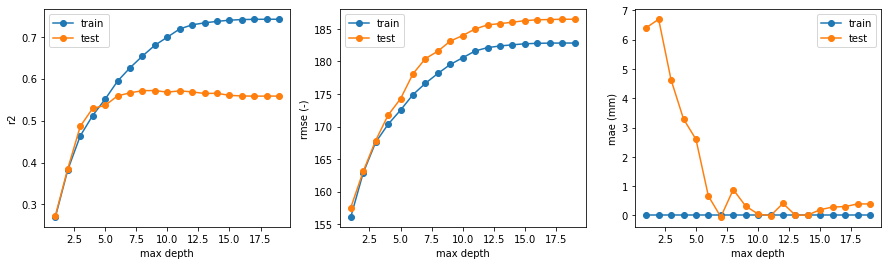

In [81]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(131)
ax.plot(ds,r2_train,'-o',label='train')
ax.plot(ds,r2_test,'-o',label='test')
ax.set_xlabel('max depth')
ax.set_ylabel('r2')
ax.legend()

ax = fig.add_subplot(132)
ax.plot(ds,rmse_train,'-o',label='train')
ax.plot(ds,rmse_test,'-o',label='test')
ax.set_xlabel('max depth')
ax.set_ylabel('rmse (-)')
ax.legend()

ax = fig.add_subplot(133)
ax.plot(ds,mae_train,'-o',label='train')
ax.plot(ds,mae_test,'-o',label='test')
ax.set_xlabel('max depth')
ax.set_ylabel('mae (mm)')
ax.legend()

Text(0, 0.5, 'Sr predicted (mm)')

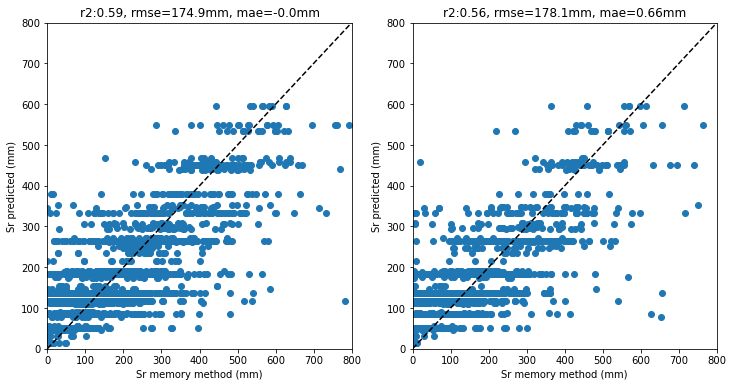

In [82]:
max_depth=6
min_samples_leaf=10
clf = tree.DecisionTreeRegressor(max_depth=max_depth,random_state=42,min_samples_leaf=min_samples_leaf)
clf = clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

r2_train = np.round(clf.score(X_train,y_train),2)
rmse_train=np.round(np.sqrt(((y_train-y_train_pred)**2).mean()),2)
mae_train=np.round((y_train-y_train_pred).mean(),2)

r2_test = np.round(clf.score(X_test,y_test),2)
rmse_test=np.round(np.sqrt(((y_test-y_test_pred)**2).mean()),2)
mae_test=np.round((y_test-y_test_pred).mean(),2)
    
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.plot(y_train,y_train_pred,'o')
ax.plot([0,800],[0,800],'k--')
ax.set_title(f'r2:{r2_train}, rmse={rmse_train}mm, mae={mae_train}mm')
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_xlabel('Sr memory method (mm)')
ax.set_ylabel('Sr predicted (mm)')

ax = fig.add_subplot(122)
ax.plot(y_test,y_test_pred,'o')
ax.plot([0,800],[0,800],'k--')
ax.set_title(f'r2:{r2_test}, rmse={rmse_test}mm, mae={mae_test}mm')
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_xlabel('Sr memory method (mm)')
ax.set_ylabel('Sr predicted (mm)')


Text(0, 0.5, 'feature importance')

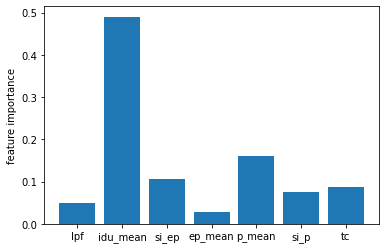

In [83]:
fi = clf.feature_importances_
plt.bar(features,fi)
plt.ylabel('feature importance')

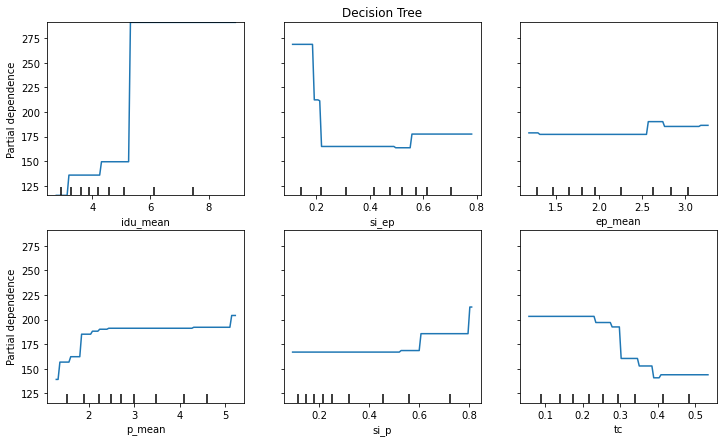

In [92]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title("Decision Tree")
tree_disp = PartialDependenceDisplay.from_estimator(clf, X_test, [1,2,3,4,5,6],feature_names=features, ax=ax)
# ax.set_xlim(

In [10]:
# fig = plt.figure(figsize=(20,10))
# tree.plot_tree(clf,feature_names=features,filled=True)

## 5. Random forest

In [150]:
def rf_regression(df,features,min_samples_leaf,max_depth,plot):
    sr_rp = 'sr_20'
    dfx = df[features].values
    dfy = df[sr_rp].values

    X_train, X_test, y_train, y_test = train_test_split(dfx, dfy.reshape(-1, 1).ravel(), test_size=0.33, random_state=42)
    
    rf = RandomForestRegressor(random_state=42,min_samples_leaf=min_samples_leaf,max_depth=max_depth)
    rf = rf.fit(X_train, y_train)
    train_y_pred = rf.predict(X_train)
    test_y_pred = rf.predict(X_test)

    train_mse = int(mean_squared_error(y_train, train_y_pred))
    train_mae = int(mean_absolute_error(y_train, train_y_pred))
    train_r2 = np.round(r2_score(y_train, train_y_pred),2)
    train_r2_adj =  np.round(r2_adj(y_train, train_y_pred,features),2)
    train_rmse = int(rmse(y_train,train_y_pred))
    train_mape =  np.round(mean_absolute_percentage_error(y_train, train_y_pred),2)

    test_mse = int(mean_squared_error(y_test, test_y_pred))
    test_mae = int(mean_absolute_error(y_test, test_y_pred))
    test_r2 = np.round(r2_score(y_test, test_y_pred),2)
    test_r2_adj = np.round(r2_adj(y_test, test_y_pred,features),2)
    test_rmse = int(rmse(y_test,test_y_pred))
    test_mape = np.round(mean_absolute_percentage_error(y_test, test_y_pred),2)
    
    n_test = len(y_test)
    n_train = len(y_train)

    sdf = pd.DataFrame(index=[0])
    sdf[features] = np.round(rf.feature_importances_,2)
    sdf[['train_mse','train_rmse','train_mae','train_r2','train_r2_adj','train_mape']] = [train_mse,train_rmse,train_mae,train_r2,train_r2_adj,train_mape]
    sdf[['test_mse','test_rmse','test_mae','test_r2','test_r2_adj','test_mape']] = [test_mse,test_rmse,test_mae,test_r2,test_r2_adj,test_mape]
    sdf[['n_train','n_test']] = [n_train,n_test]
    
    if (plot==True):
        fig = plt.figure(figsize=(12,6))
        ax = fig.add_subplot(121)
        ax.plot(y_train,train_y_pred,'o')
        ax.plot([0,800],[0,800],'k--')
        ax.set_title(f'r2:{train_r2}, rmse={train_rmse}mm, mae={train_mae}mm')
        ax.set_xlim(0,800)
        ax.set_ylim(0,800)
        ax.set_xlabel('Sr memory method (mm)')
        ax.set_ylabel('Sr predicted (mm)')

        ax = fig.add_subplot(122)
        ax.plot(y_test,test_y_pred,'o')
        ax.plot([0,800],[0,800],'k--')
        ax.set_title(f'r2:{test_r2}, rmse={test_rmse}mm, mae={test_mae}mm')
        ax.set_xlim(0,800)
        ax.set_ylim(0,800)
        ax.set_xlabel('Sr memory method (mm)')
        ax.set_ylabel('Sr predicted (mm)')
        
        fig, ax = plt.subplots(figsize=(12, 10))
        ax.set_title("Random forest partial dependences")
        tree_disp = PartialDependenceDisplay.from_estimator(rf, X_test, range(len(features)),feature_names=features, ax=ax)
    return sdf

In [44]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
df = df.dropna()
# df = df[df.tc>0.50]
# df = df.sort_values('tc')
features = ['lpf','idu_mean','si_ep','ep_mean','p_mean','si_p','tc']
sr_rp = 'sr_20'
dfx = df[features].values
dfy = df[sr_rp].values
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy.reshape(-1, 1).ravel(), test_size=0.33, random_state=42)
r2_train=[]
rmse_train=[]
r2_test=[]
r2_adj_train=[]
r2_adj_test=[]
mse_train=[]
mae_train=[]
mse_test=[]
mae_test=[]
mape_train=[]
mape_test=[]
rmse_test=[]
mae_train=[]
mae_test=[]
ds = [10,20,30,40,50,80,100,150,200]
for i in ds:
    rf = RandomForestRegressor(random_state=42,min_samples_leaf=i,max_depth=6)
    rf = rf.fit(X_train, y_train)
    train_y_pred = rf.predict(X_train)
    test_y_pred = rf.predict(X_test)
    
    train_mse = int(mean_squared_error(y_train, train_y_pred))
    train_mae = int(mean_absolute_error(y_train, train_y_pred))
    train_r2 = np.round(r2_score(y_train, train_y_pred),2)
    train_r2_adj =  np.round(r2_adj(y_train, train_y_pred,features),2)
    train_rmse = int(rmse(y_train,train_y_pred))
    train_mape =  np.round(mean_absolute_percentage_error(y_train, train_y_pred),2)
    
    test_mse = int(mean_squared_error(y_test, test_y_pred))
    test_mae = int(mean_absolute_error(y_test, test_y_pred))
    test_r2 = np.round(r2_score(y_test, test_y_pred),2)
    test_r2_adj = np.round(r2_adj(y_test, test_y_pred,features),2)
    test_rmse = int(rmse(y_test,test_y_pred))
    test_mape = np.round(mean_absolute_percentage_error(y_test, test_y_pred),2)
    
    r2_train.append(train_r2)
    r2_adj_train.append(train_r2_adj)
    rmse_train.append(train_rmse)
    mae_train.append(train_mae)
    mse_train.append(train_mse)
    mape_train.append(train_mape)
    
    r2_test.append(test_r2)
    r2_adj_test.append(test_r2_adj)
    rmse_test.append(test_rmse)
    mae_test.append(test_mae)
    mse_test.append(test_mse)
    mape_test.append(test_mape)
    
    n_test = len(y_test)
    n_train = len(y_train)

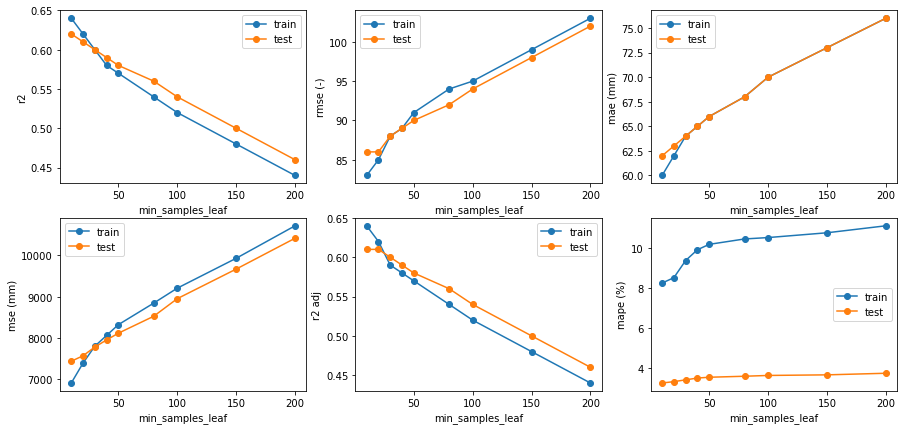

In [45]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(231)
ax.plot(ds,r2_train,'-o',label='train')
ax.plot(ds,r2_test,'-o',label='test')
ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('r2')
ax.legend()

ax = fig.add_subplot(232)
ax.plot(ds,rmse_train,'-o',label='train')
ax.plot(ds,rmse_test,'-o',label='test')
ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('rmse (-)')
ax.legend()

ax = fig.add_subplot(233)
ax.plot(ds,mae_train,'-o',label='train')
ax.plot(ds,mae_test,'-o',label='test')
ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('mae (mm)')
ax.legend()

ax = fig.add_subplot(234)
ax.plot(ds,mse_train,'-o',label='train')
ax.plot(ds,mse_test,'-o',label='test')
ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('mse (mm)')
ax.legend()

ax = fig.add_subplot(235)
ax.plot(ds,r2_adj_train,'-o',label='train')
ax.plot(ds,r2_adj_test,'-o',label='test')
ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('r2 adj')
ax.legend()

ax = fig.add_subplot(236)
ax.plot(ds,mape_train,'-o',label='train')
ax.plot(ds,mape_test,'-o',label='test')
ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('mape (%)')
ax.legend()

In [59]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
df = df.dropna()
# df = df[df.tc>0.50]
# df = df.sort_values('tc')
features = ['lpf','idu_mean','si_ep','ep_mean','p_mean','si_p','tc']
sr_rp = 'sr_20'
dfx = df[features].values
dfy = df[sr_rp].values
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy.reshape(-1, 1).ravel(), test_size=0.33, random_state=42)
r2_train=[]
rmse_train=[]
r2_test=[]
r2_adj_train=[]
r2_adj_test=[]
mse_train=[]
mae_train=[]
mse_test=[]
mae_test=[]
mape_train=[]
mape_test=[]
rmse_test=[]
mae_train=[]
mae_test=[]
md = [2,3,4,5,6,7,8,9,10,15,20]
for i in md:
    rf = RandomForestRegressor(random_state=42,min_samples_leaf=30,max_depth=i)
    rf = rf.fit(X_train, y_train)
    train_y_pred = rf.predict(X_train)
    test_y_pred = rf.predict(X_test)
    
    train_mse = int(mean_squared_error(y_train, train_y_pred))
    train_mae = int(mean_absolute_error(y_train, train_y_pred))
    train_r2 = np.round(r2_score(y_train, train_y_pred),2)
    train_r2_adj =  np.round(r2_adj(y_train, train_y_pred,features),2)
    train_rmse = int(rmse(y_train,train_y_pred))
    train_mape =  np.round(mean_absolute_percentage_error(y_train, train_y_pred),2)
    
    test_mse = int(mean_squared_error(y_test, test_y_pred))
    test_mae = int(mean_absolute_error(y_test, test_y_pred))
    test_r2 = np.round(r2_score(y_test, test_y_pred),2)
    test_r2_adj = np.round(r2_adj(y_test, test_y_pred,features),2)
    test_rmse = int(rmse(y_test,test_y_pred))
    test_mape = np.round(mean_absolute_percentage_error(y_test, test_y_pred),2)
    
    r2_train.append(train_r2)
    r2_adj_train.append(train_r2_adj)
    rmse_train.append(train_rmse)
    mae_train.append(train_mae)
    mse_train.append(train_mse)
    mape_train.append(train_mape)
    
    r2_test.append(test_r2)
    r2_adj_test.append(test_r2_adj)
    rmse_test.append(test_rmse)
    mae_test.append(test_mae)
    mse_test.append(test_mse)
    mape_test.append(test_mape)
    
    n_test = len(y_test)
    n_train = len(y_train)

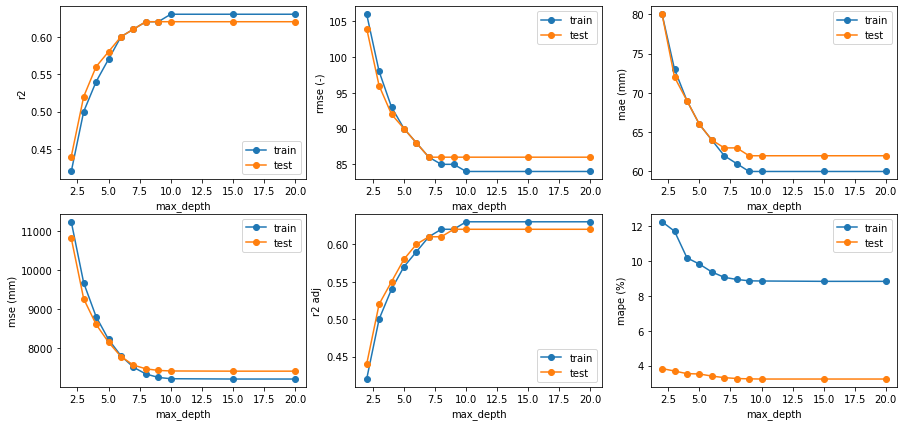

In [60]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(231)
ax.plot(md,r2_train,'-o',label='train')
ax.plot(md,r2_test,'-o',label='test')
ax.set_xlabel('max_depth')
ax.set_ylabel('r2')
ax.legend()

ax = fig.add_subplot(232)
ax.plot(md,rmse_train,'-o',label='train')
ax.plot(md,rmse_test,'-o',label='test')
ax.set_xlabel('max_depth')
ax.set_ylabel('rmse (-)')
ax.legend()

ax = fig.add_subplot(233)
ax.plot(md,mae_train,'-o',label='train')
ax.plot(md,mae_test,'-o',label='test')
ax.set_xlabel('max_depth')
ax.set_ylabel('mae (mm)')
ax.legend()

ax = fig.add_subplot(234)
ax.plot(md,mse_train,'-o',label='train')
ax.plot(md,mse_test,'-o',label='test')
ax.set_xlabel('max_depth')
ax.set_ylabel('mse (mm)')
ax.legend()

ax = fig.add_subplot(235)
ax.plot(md,r2_adj_train,'-o',label='train')
ax.plot(md,r2_adj_test,'-o',label='test')
ax.set_xlabel('max_depth')
ax.set_ylabel('r2 adj')
ax.legend()

ax = fig.add_subplot(236)
ax.plot(md,mape_train,'-o',label='train')
ax.plot(md,mape_test,'-o',label='test')
ax.set_xlabel('max_depth')
ax.set_ylabel('mape (%)')
ax.legend()

In [92]:
# run random forest with fixed hyperparameters
min_samples_leaf=30
max_depth=7
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
df = df.dropna()
features = ['lpf','idu_mean','si_ep','ep_mean','p_mean','si_p','tc']
sdf = rf_regression(df,features,min_samples_leaf,max_depth)
sdf.to_csv(f'{work_dir}/output/regression/rf_regression_table_md{max_depth}_msl{min_samples_leaf}.csv')
sdf

,lpf,idu_mean,si_ep,ep_mean,p_mean,si_p,tc,train_mse,train_rmse,train_mae,...,train_r2_adj,train_mape,test_mse,test_rmse,test_mae,test_r2,test_r2_adj,test_mape,n_train,n_test
0,0.03,0.52,0.1,0.03,0.15,0.08,0.09,7505,86,62,...,0.61,9.07,7561,86,63,0.61,0.61,3.31,3065,1510


In [83]:
# select which features are less and more than average important for regression
# from sklearn.feature_selection import SelectFromModel
# sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
# sel.fit(X_train, y_train)
# sel.get_support()

SelectFromModel(estimator=RandomForestRegressor())

Text(0, 0.5, 'Sr predicted (mm)')

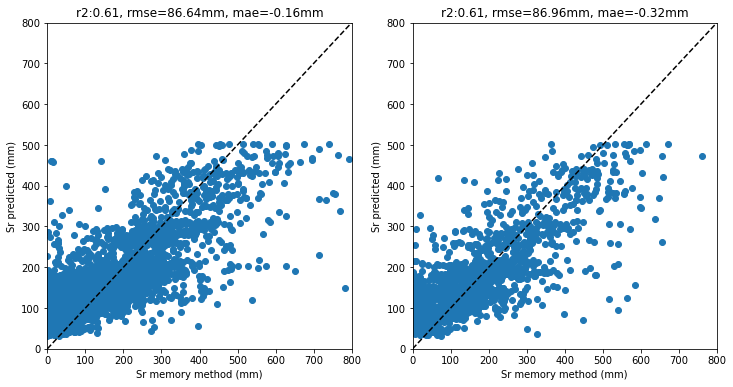

In [86]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.plot(y_train,y_train_pred,'o')
ax.plot([0,800],[0,800],'k--')
ax.set_title(f'r2:{r2_train}, rmse={rmse_train}mm, mae={mae_train}mm')
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_xlabel('Sr memory method (mm)')
ax.set_ylabel('Sr predicted (mm)')

ax = fig.add_subplot(122)
ax.plot(y_test,y_test_pred,'o')
ax.plot([0,800],[0,800],'k--')
ax.set_title(f'r2:{r2_test}, rmse={rmse_test}mm, mae={mae_test}mm')
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_xlabel('Sr memory method (mm)')
ax.set_ylabel('Sr predicted (mm)')

Text(0, 0.5, 'feature importance')

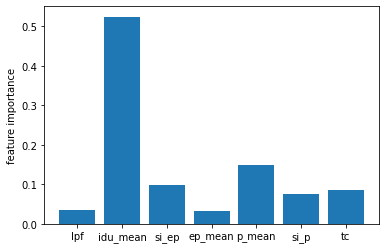

In [87]:
fi = rf.feature_importances_
plt.bar(features,fi)
plt.ylabel('feature importance')

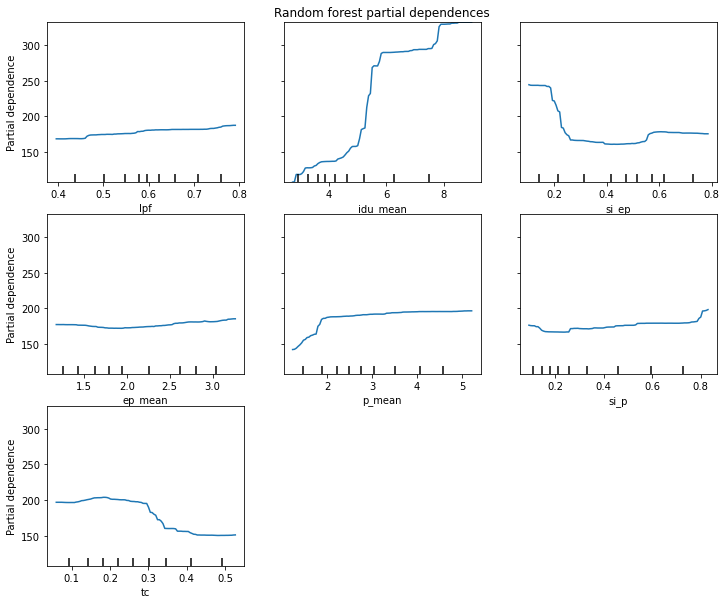

In [88]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_title("Random forest partial dependences")
tree_disp = PartialDependenceDisplay.from_estimator(rf, X_test, [0,1,2,3,4,5,6],feature_names=features, ax=ax)

## group clusters

In [145]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}_clusters.csv',index_col=0)
df = df.dropna()
features = ['lpf','si_ep','ep_mean','idu_mean','p_mean','si_p','tc']
all_combinations = get_combinations(features) # method call
ll = []
min_samples_leaf=10
max_depth=7
df = df[df['sr_20']>0]
clusters = [0,1,2,3,4]
m = []
for i in clusters:
    dfc = df[df.cluster==i]
    dfc_tc = np.round(dfc.tc.mean(),2)
    dfc_ntc = np.round(dfc.ntc.mean(),2)
    dfc_nonveg = np.round(dfc.nonveg.mean(),2)
    dfc_srm = int(dfc.sr_20.mean())
    dfc_srs = int(dfc.sr_20.std())
    l =  rf_regression(dfc,features,min_samples_leaf,max_depth,plot=False)
    l.index = [i]
    l[['tc_mean','ntc_mean','nonveg_mean']] = dfc_tc,dfc_ntc,dfc_nonveg
    l[['sr_mean','sr_std']] = dfc_srm,dfc_srs
    m.append(l)
mm = pd.concat(m)
ll.append(mm)
md = pd.concat(ll)
md.to_csv(f'{work_dir}/output/regression/rf_regression_table_md{max_depth}_msl{min_samples_leaf}_clusters.csv')

## group tree cover

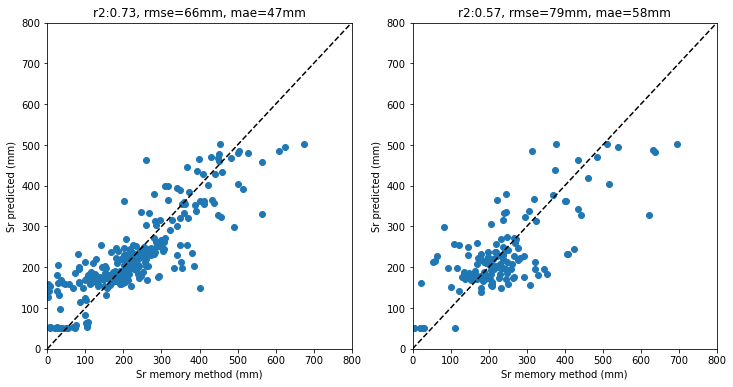

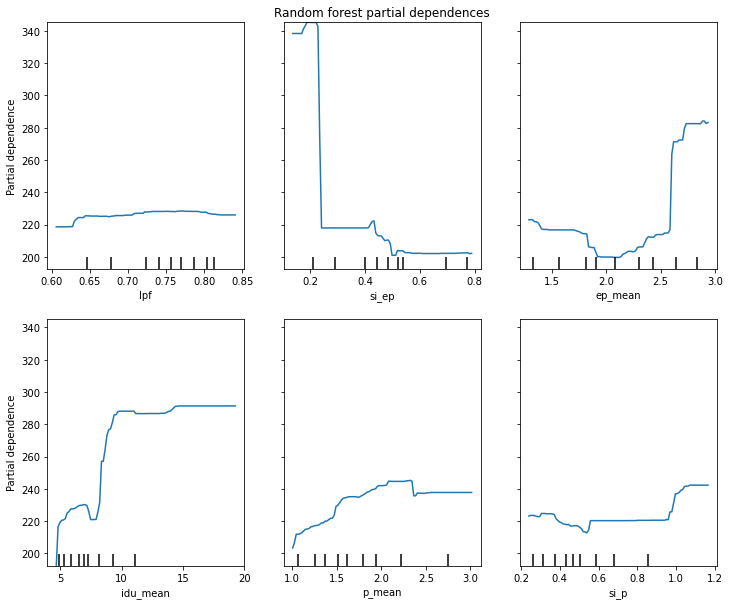

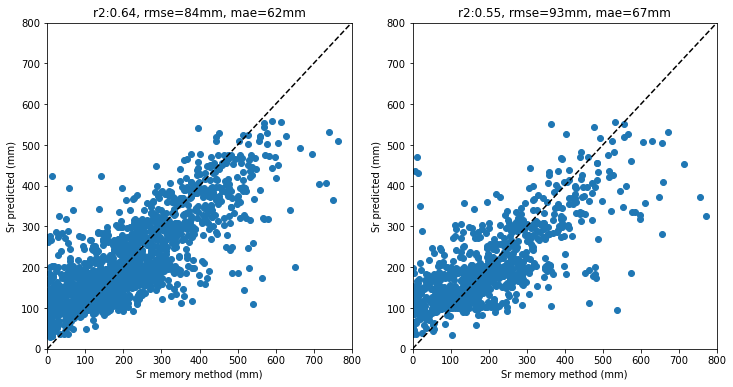

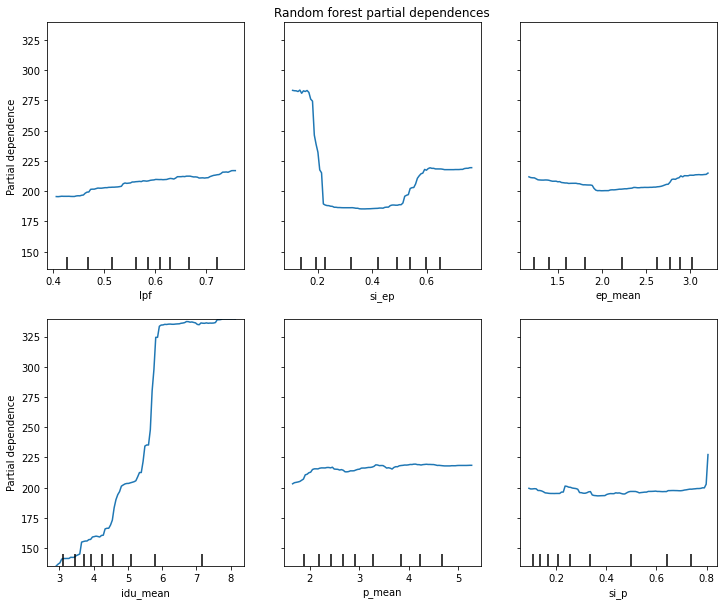

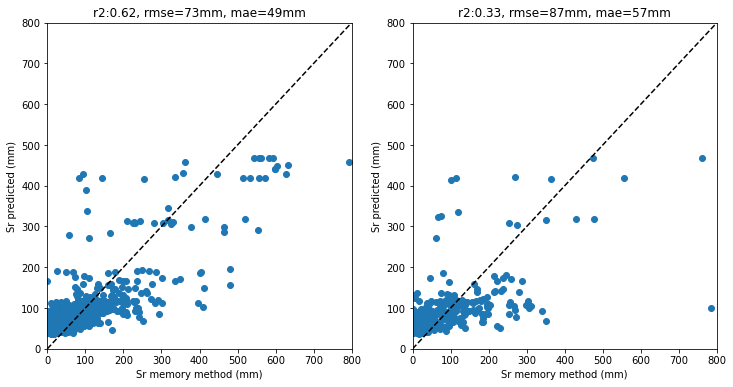

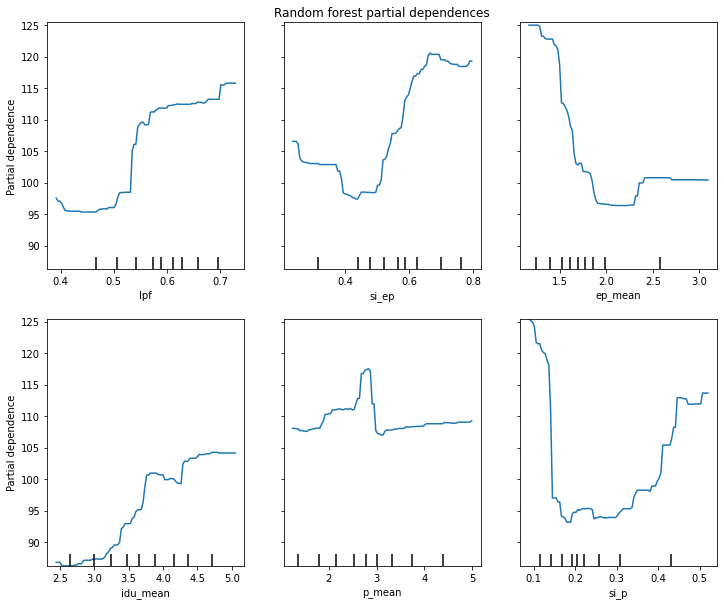

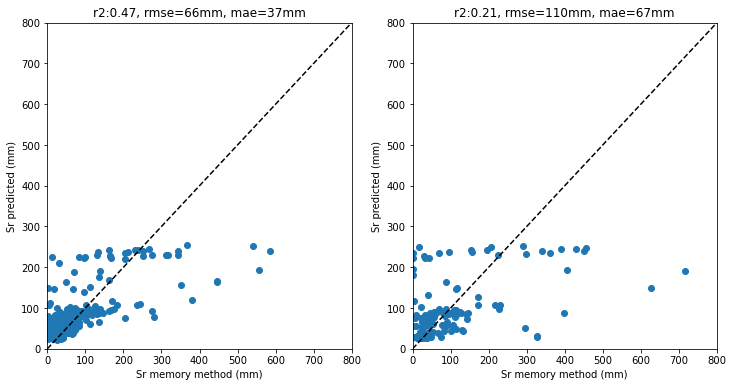

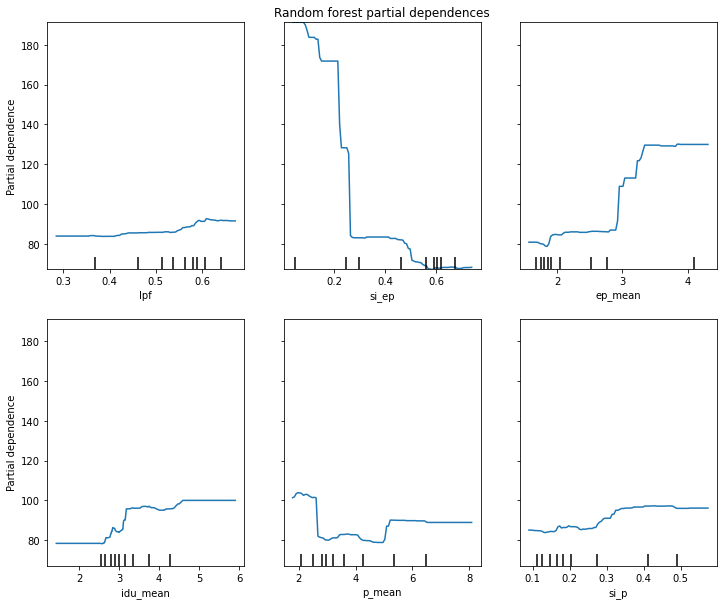

In [151]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}_clusters.csv',index_col=0)
df = df.dropna()
features = ['lpf','si_ep','ep_mean','idu_mean','p_mean','si_p']
all_combinations = get_combinations(features) # method call
ll = []
min_samples_leaf=10
max_depth=7
df = df[df['sr_20']>0]
tc_groups = ['bare','lowveg','mix','highveg']
m = []
for i in range(len(tc_groups)):
    if (i==0):
        dfc = df[(df.tc<0.1)&(df.ntc>0.5)]
    if (i==1):
        dfc = df[(df.tc>0.1)&(df.tc<0.5)&(df.ntc>0.5)]
    if (i==2):
        dfc = df[(df.tc>0.1)&(df.tc<0.5)&(df.ntc<0.5)]
    if (i==3):
        dfc = df[(df.tc>0.5)&(df.ntc<0.5)]
    dfc_tc = np.round(dfc.tc.mean(),2)
    dfc_ntc = np.round(dfc.ntc.mean(),2)
    dfc_nonveg = np.round(dfc.nonveg.mean(),2)
    dfc_srm = int(dfc.sr_20.mean())
    dfc_srs = int(dfc.sr_20.std())
    l = rf_regression(dfc,features,min_samples_leaf,max_depth,plot=True)
    l.index = [tc_groups[i]]
    l[['tc_mean','ntc_mean','nonveg_mean']] = dfc_tc,dfc_ntc,dfc_nonveg
    l[['sr_mean','sr_std']] = dfc_srm,dfc_srs
    m.append(l)
mm = pd.concat(m)
ll.append(mm)
md = pd.concat(ll)
md.to_csv(f'{work_dir}/output/regression/rf_regression_table_md{max_depth}_msl{min_samples_leaf}_treecovergroups.csv')

## group tree cover bins

,lpf,idu_mean,si_ep,ep_mean,p_mean,si_p,train_mse,train_rmse,train_mae,train_r2,...,test_r2,test_r2_adj,test_mape,n_train,n_test,tc_mean,ntc_mean,nonveg_mean,sr_mean,sr_std
0,0.02,0.21,0.14,0.27,0.14,0.21,2938,54,39,0.76,...,0.57,0.55,0.71,306,151,0.06,0.61,0.33,208,112
1,0.09,0.21,0.11,0.18,0.10,0.30,5004,70,49,0.77,...,0.68,0.67,6.59,306,152,0.12,0.69,0.19,271,148
2,0.14,0.12,0.30,0.17,0.10,0.16,4498,67,47,0.76,...,0.59,0.58,5.18,306,151,0.16,0.67,0.17,249,134
3,0.06,0.63,0.15,0.04,0.04,0.07,4819,69,48,0.79,...,0.58,0.56,6.50,306,152,0.20,0.64,0.16,229,151
4,0.10,0.53,0.09,0.12,0.06,0.09,5878,76,55,0.68,...,0.53,0.51,2.08,306,151,0.24,0.60,0.15,197,132
5,0.06,0.55,0.07,0.10,0.11,0.10,4456,66,50,0.71,...,0.22,0.19,2.39,306,152,0.28,0.58,0.14,172,119
6,0.09,0.18,0.11,0.28,0.08,0.27,4650,68,46,0.64,...,0.42,0.39,82.89,306,151,0.33,0.53,0.14,135,112
7,0.07,0.26,0.17,0.22,0.13,0.15,4846,69,46,0.69,...,0.46,0.44,10.36,306,152,0.38,0.49,0.13,133,127
8,0.12,0.28,0.09,0.06,0.07,0.39,3561,59,38,0.66,...,0.49,0.47,1.81,306,151,0.45,0.42,0.14,91,98
9,0.14,0.08,0.27,0.35,0.09,0.07,3554,59,34,0.59,...,0.24,0.21,5.70,306,152,0.55,0.34,0.11,91,103


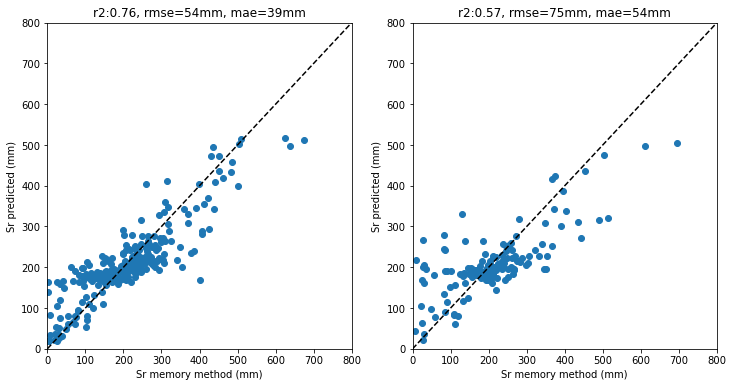

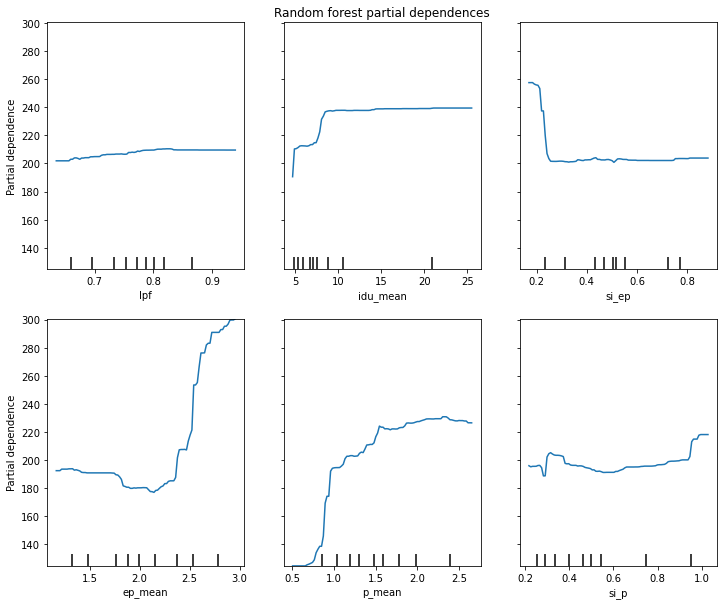

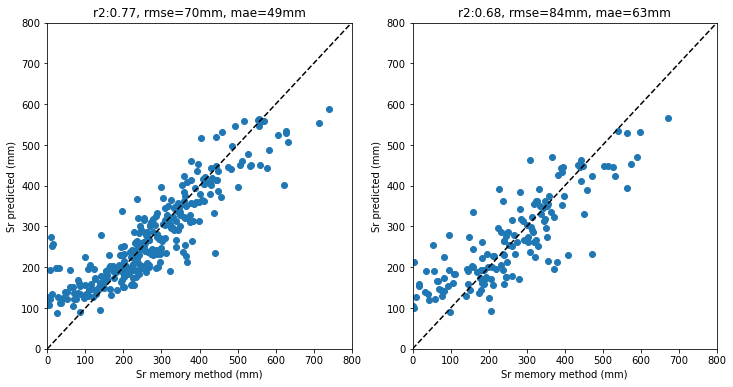

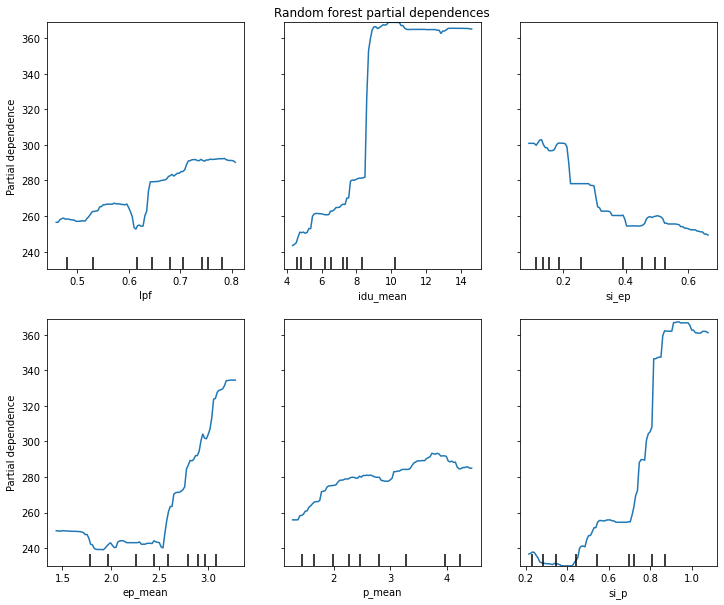

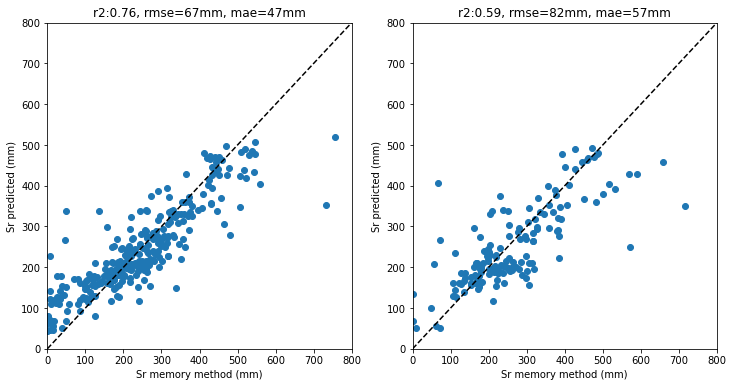

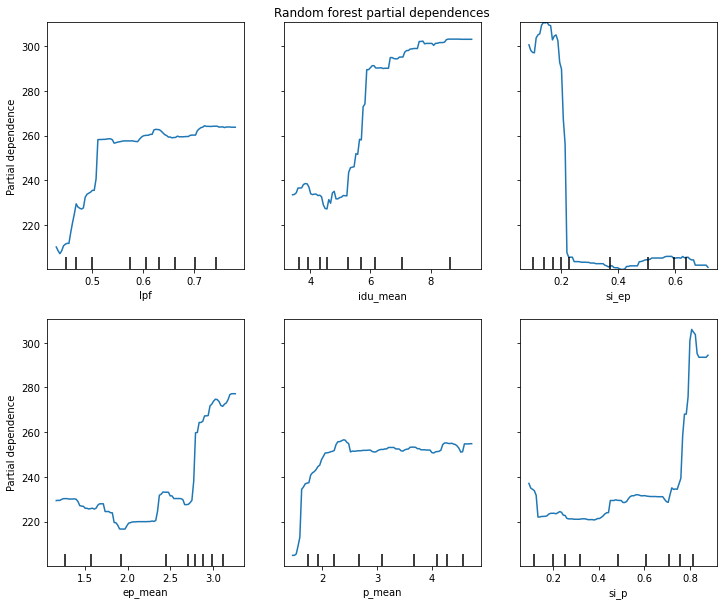

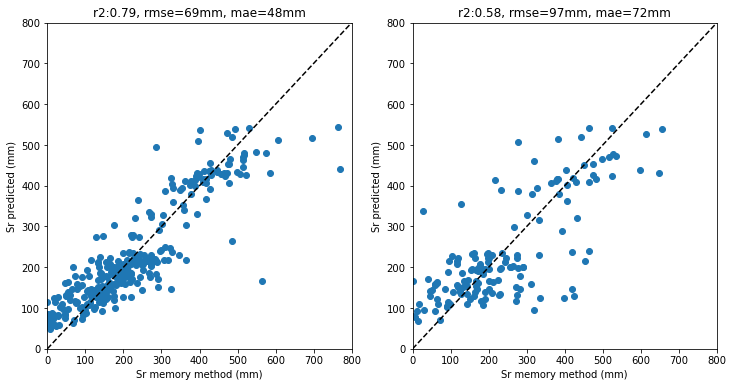

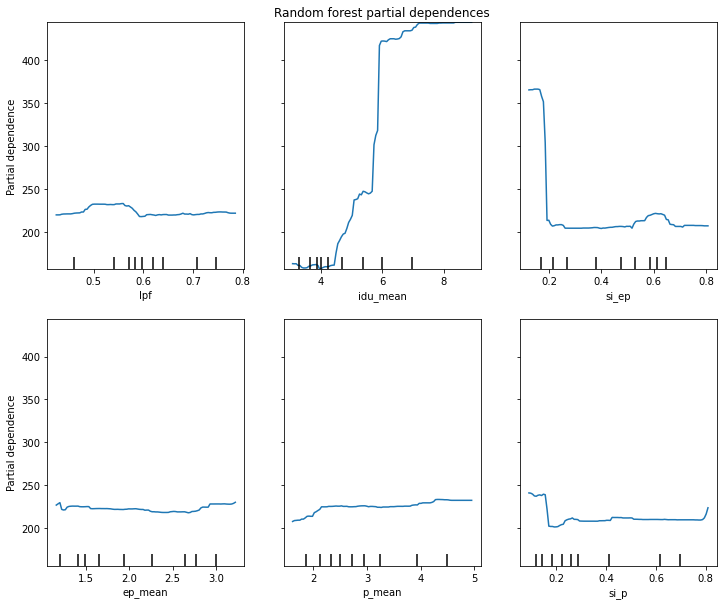

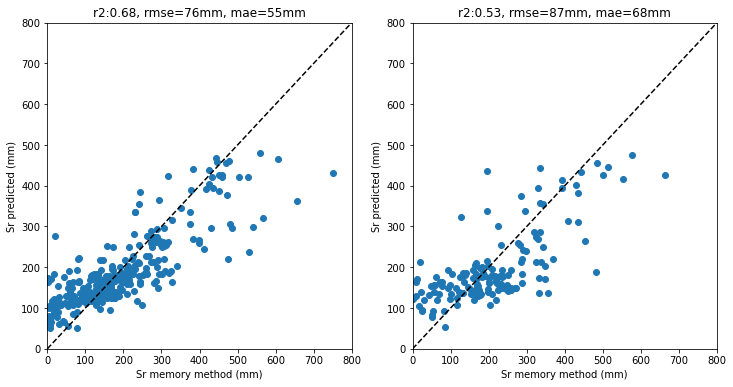

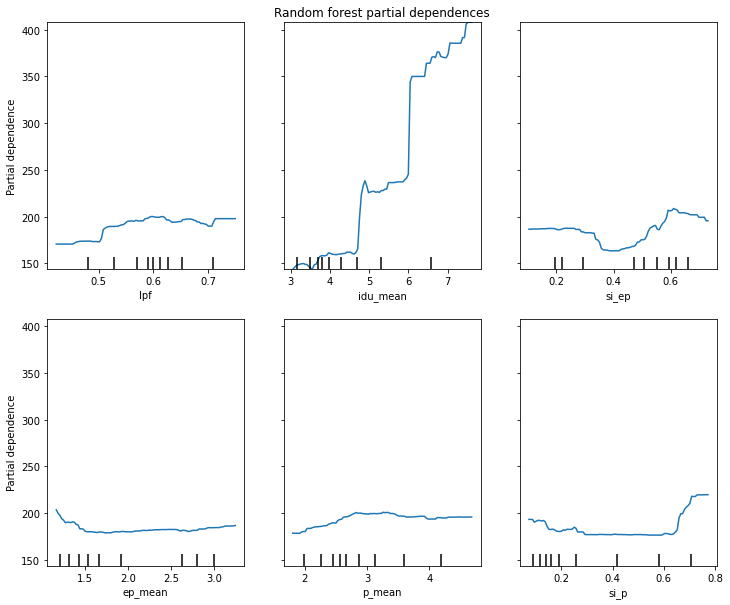

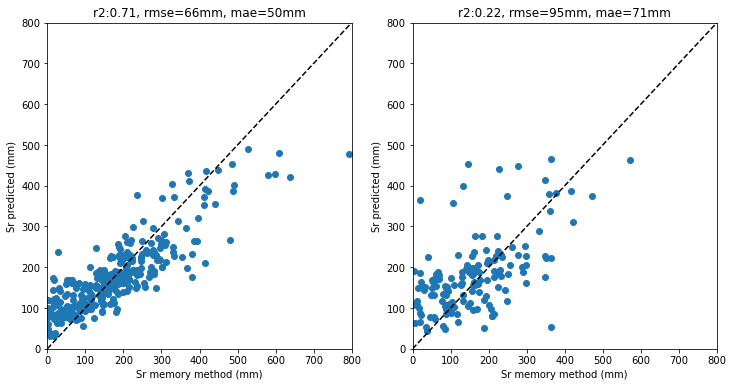

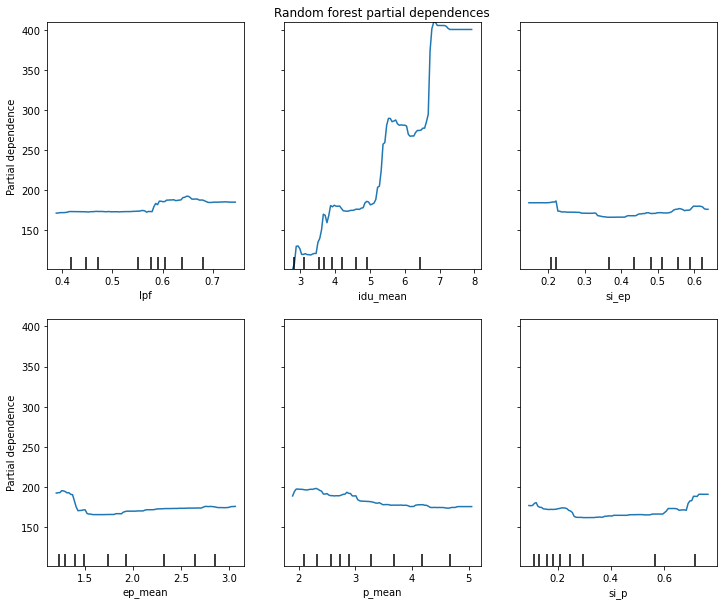

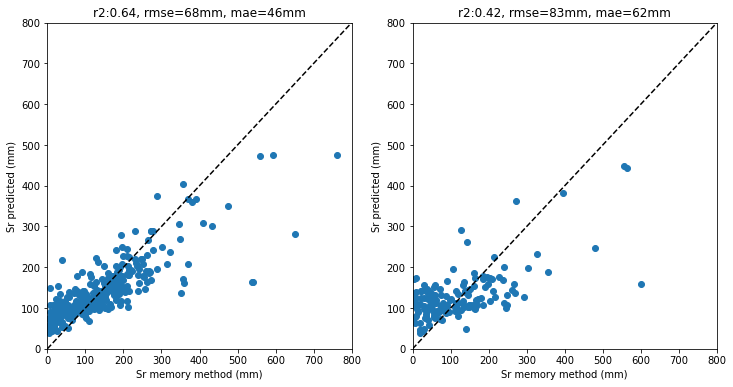

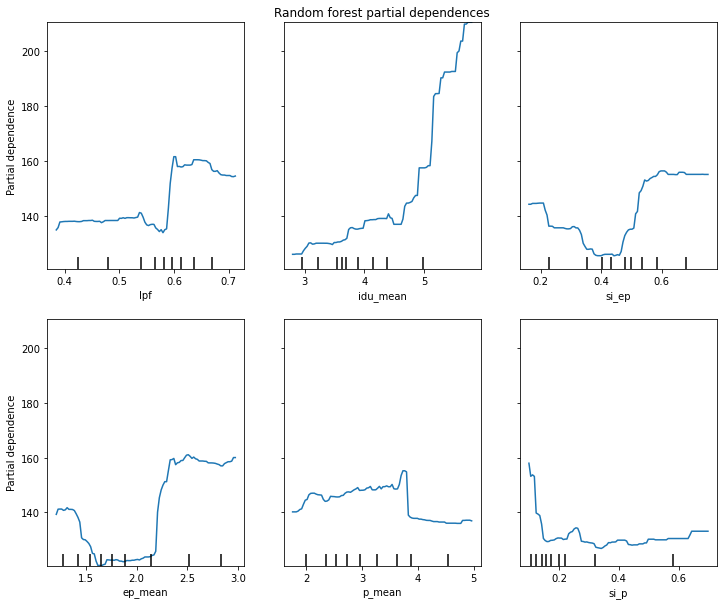

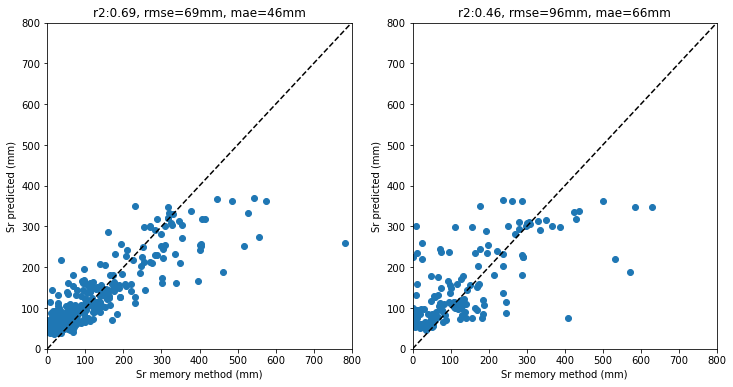

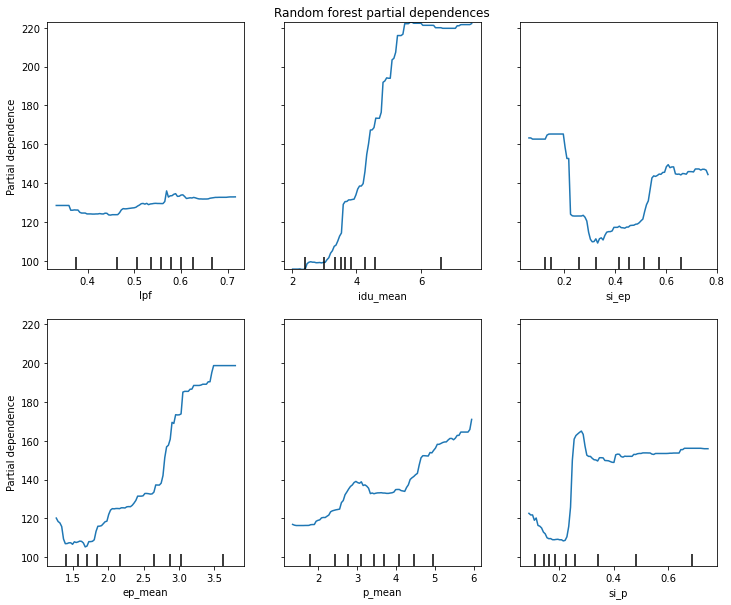

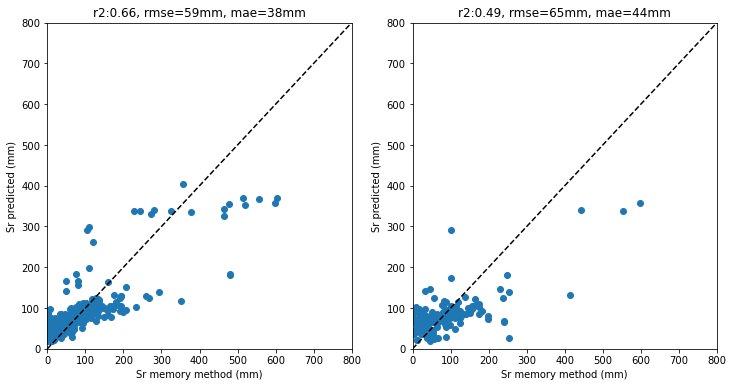

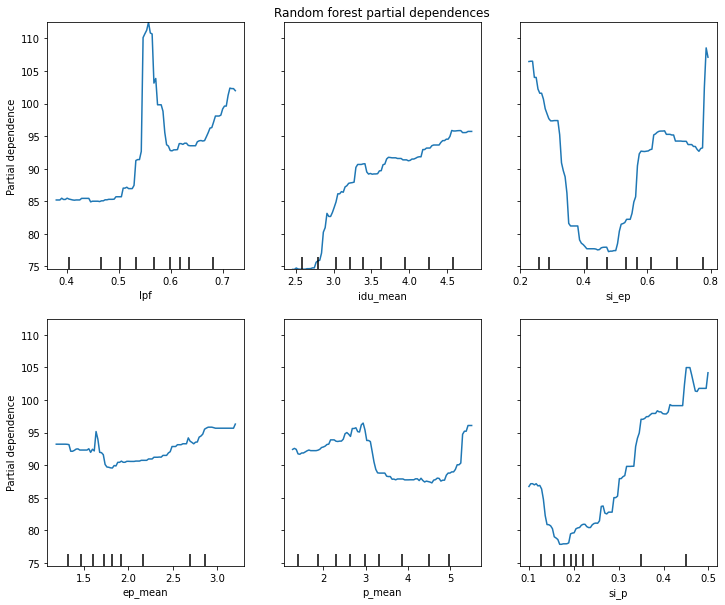

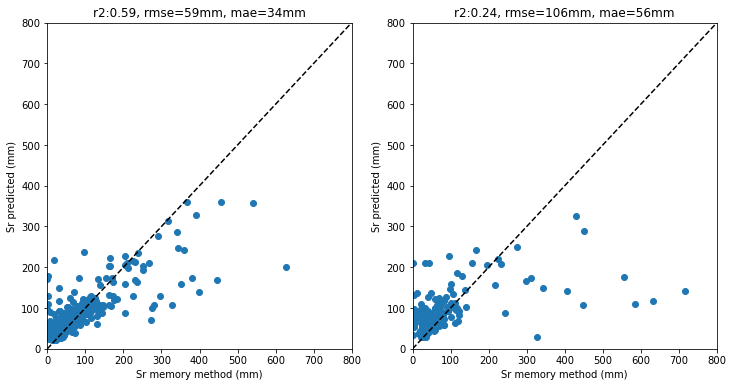

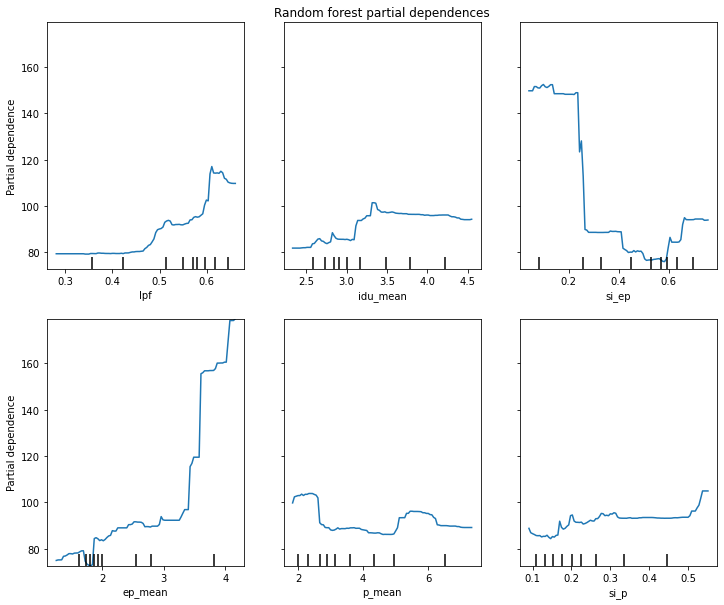

In [152]:
# iterate over feature-combinations and over tree cover bins
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}_clusters.csv',index_col=0)
df = df.dropna()
df = df.sort_values('tc')
min_samples_leaf=5
max_depth=7
features = ['lpf','idu_mean','si_ep','ep_mean','p_mean','si_p']
all_combinations = get_combinations(features) # method call
ll = []
df = df[df['sr_20']>0]
m = []
bins=10
for i in range(bins):
    dfc = df.iloc[int((i*len(df))/bins):int(((i+1)*len(df))/bins)]
    dfc_tc = np.round(dfc.tc.mean(),2)
    dfc_ntc = np.round(dfc.ntc.mean(),2)
    dfc_nonveg = np.round(dfc.nonveg.mean(),2)
    dfc_srm = int(dfc.sr_20.mean())
    dfc_srs = int(dfc.sr_20.std())
    l = rf_regression(dfc,features,min_samples_leaf,max_depth,plot=True)
    l.index = [i]
    l[['tc_mean','ntc_mean','nonveg_mean']] = dfc_tc,dfc_ntc,dfc_nonveg
    l[['sr_mean','sr_std']] = dfc_srm,dfc_srs
    m.append(l)
mm = pd.concat(m)
ll.append(mm)
md = pd.concat(ll)
md.to_csv(f'{work_dir}/output/regression/rf_regression_table_md{max_depth}_msl{min_samples_leaf}_treecoverbins.csv')
md

Text(0, 0.5, 'Sr predicted (mm)')

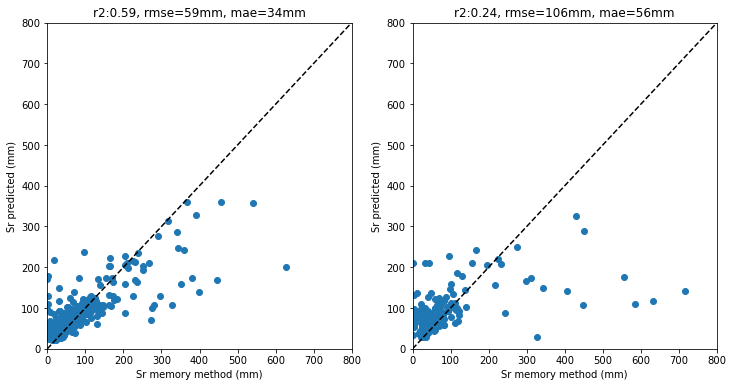

In [161]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}_clusters.csv',index_col=0)
df = df.dropna()
df = df.sort_values('tc')

min_samples_leaf=5
max_depth=7
features = ['lpf','idu_mean','si_ep','ep_mean','p_mean','si_p']
df = df[df['sr_20']>0]
bins=10
i=9
dfc = df.iloc[int((i*len(df))/bins):int(((i+1)*len(df))/bins)]
df = dfc
sr_rp = 'sr_20'
dfx = df[features].values
dfy = df[sr_rp].values

X_train, X_test, y_train, y_test = train_test_split(dfx, dfy.reshape(-1, 1).ravel(), test_size=0.33, random_state=42)

rf = RandomForestRegressor(random_state=42,min_samples_leaf=min_samples_leaf,max_depth=max_depth)
rf = rf.fit(X_train, y_train)
train_y_pred = rf.predict(X_train)
test_y_pred = rf.predict(X_test)
train_mse = int(mean_squared_error(y_train, train_y_pred))
train_mae = int(mean_absolute_error(y_train, train_y_pred))
train_r2 = np.round(r2_score(y_train, train_y_pred),2)
train_r2_adj =  np.round(r2_adj(y_train, train_y_pred,features),2)
train_rmse = int(rmse(y_train,train_y_pred))
train_mape =  np.round(mean_absolute_percentage_error(y_train, train_y_pred),2)

test_mse = int(mean_squared_error(y_test, test_y_pred))
test_mae = int(mean_absolute_error(y_test, test_y_pred))
test_r2 = np.round(r2_score(y_test, test_y_pred),2)
test_r2_adj = np.round(r2_adj(y_test, test_y_pred,features),2)
test_rmse = int(rmse(y_test,test_y_pred))
test_mape = np.round(mean_absolute_percentage_error(y_test, test_y_pred),2)
    

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.plot(y_train,train_y_pred,'o')
ax.plot([0,800],[0,800],'k--')
ax.set_title(f'r2:{train_r2}, rmse={train_rmse}mm, mae={train_mae}mm')
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_xlabel('Sr memory method (mm)')
ax.set_ylabel('Sr predicted (mm)')

ax = fig.add_subplot(122)
ax.plot(y_test,test_y_pred,'o')
ax.plot([0,800],[0,800],'k--')
ax.set_title(f'r2:{test_r2}, rmse={test_rmse}mm, mae={test_mae}mm')
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_xlabel('Sr memory method (mm)')
ax.set_ylabel('Sr predicted (mm)')

Text(0, 0.5, 'feature importance')

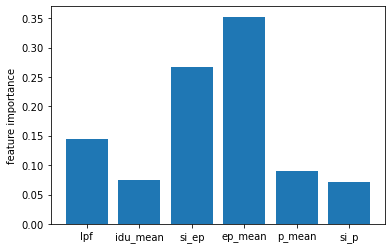

In [162]:
fi = rf.feature_importances_
plt.bar(features,fi)
plt.ylabel('feature importance')

In [163]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [164]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

In [171]:
i = 100
shap.force_plot(explainer.expected_value, shap_values[i], features=X_train[i], feature_names=features)

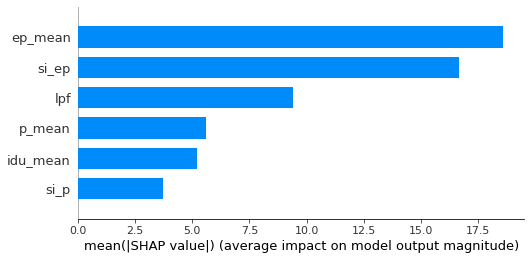

In [167]:
shap.summary_plot(shap_values, features=X_train, feature_names=features, plot_type='bar')

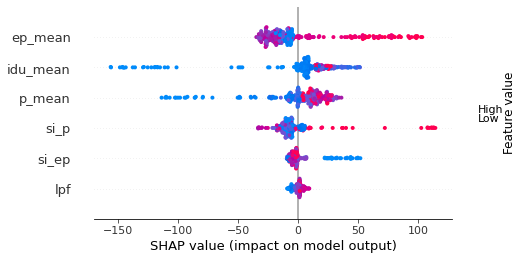

In [159]:
# color is feature value, red=high, blue=low
# shap value represents impact on model output + or -
# from top to bottom reducing feature importance
# dots are shap value for each feature for each sample
shap.summary_plot(shap_values, features=X_train, feature_names=features)


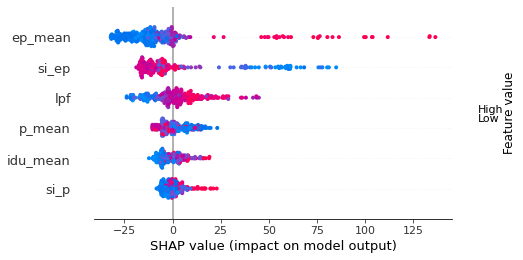

In [165]:
shap.summary_plot(shap_values, features=X_train, feature_names=features)


## 6. Hahm scripts random forest

In [12]:
f = f'{work_dir}/output/catchment_characteristics/master_characteristics_gswp-p_gleam-ep_gswp-t.csv'
df = pd.read_csv(f,index_col=0)
df = df.dropna()

In [14]:
from sklearn.model_selection import train_test_split

target = df['sr_20']
predictors = ['p_mean','ep_mean','cvp','asi']
# predictors = ['lpf', 'idu_mean', 'si_ep', 'ep_mean', 'p_mean', 'si_p']
# predictors = ['idu_mean','si_ep','ep_mean','si_p','p_mean','tc']
pred_df = df[predictors]


X_train, X_valid, y_train, y_valid = train_test_split(pred_df.values, 
                                                      target.values, 
                                                      random_state=42)
MIN_SAMPLES_LEAF = 100

m = RandomForestRegressor(
                          n_jobs=-1, 
                          min_samples_leaf=MIN_SAMPLES_LEAF,
                          oob_score=True)
m_all = RandomForestRegressor(
                          min_samples_leaf=MIN_SAMPLES_LEAF,
                          n_jobs=-1, 
                          oob_score=True)
m.fit(X_train, y_train)
m_all.fit(pred_df.values,target.values)

RandomForestRegressor(min_samples_leaf=100, n_jobs=-1, oob_score=True)

In [15]:
def rmse(x,y): 
    return np.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
                       
print_score(m)

# Percent variance explained by model (R2 score)
metrics.r2_score(target.values,m.predict(pred_df.values))

[107.31822971095876, 109.33623284866016, 0.3971201487362055, 0.4004910835441414, 0.3623457299062761]


0.39839625855465166

In [16]:
### HYPERPARAMETER EXPLORATION
rmses = []
min_leaves = [1,2,3,4,5,6,7,8]
for leaves in min_leaves:
    m = RandomForestRegressor(n_estimators=20,
                            n_jobs=-1, 
                            min_samples_leaf=leaves)
    m.fit(X_train, y_train)
    rmses.append(rmse(m.predict(X_valid), y_valid))

Text(0.5, 0, 'Min samples per leaf')

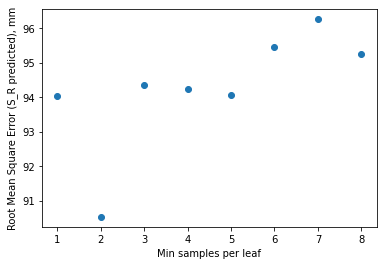

In [17]:
plt.scatter(min_leaves,rmses)
plt.ylabel('Root Mean Square Error (S_R predicted), mm')
plt.xlabel('Min samples per leaf')

Text(0.5, 0, 'Permutation feature importance')

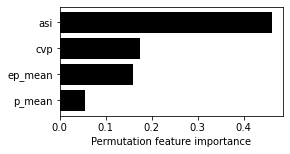

In [18]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(m_all, pred_df.values, target.values,random_state=87)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(4, 2))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], 
         align='center',color='black')
ytick_labels = ['ASI','Mean PET (mm/y)','Mean P (mm/y)','$CV_P$']
ytick_labels = predictors
plt.yticks(range(len(sorted_idx)), np.array(pred_df.columns)[sorted_idx])
plt.yticks(range(len(sorted_idx)), ytick_labels)

plt.xlabel('Permutation feature importance')

# sns.despine()
# plt.savefig(folder_path+'Figures/'+'feat_imp.pdf',bbox_inches='tight')

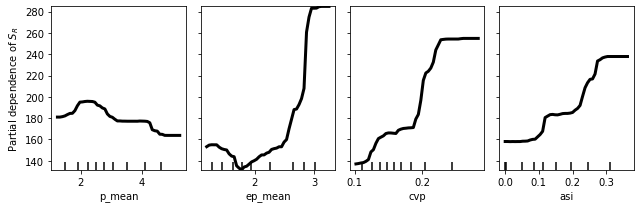

In [21]:
f, ax = plt.subplots(1, 4, figsize=(9,3), sharey=True)

pdp = PartialDependenceDisplay.from_estimator(
    m_all, pred_df.values, [0,1,2,3], 
    feature_names=predictors, 
    n_jobs=3, ax=ax, 
    grid_resolution=50, line_kw={'color':'black','lw':'3'})
# plt.ylim(300,500)
ax[0].set_ylabel('Partial dependence of $S_R$')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[3].set_ylabel('')
x_labels = ['Mean P (mm/d)', 'Mean PET (mm/d)','$CV_P$','ASI']
x_labels = predictors
for i in range(len(ax)):
    ax[i].set_xlabel(x_labels[i])

# ax[2].set_xlim(0.2,0.5)
# ax[3].set_xlim(0.5,0.75)
f.tight_layout()
# sns.despine()
# plt.savefig(folder_path+'Figures/'+'partial_dependence.pdf',bbox_inches='tight')